<a href="https://colab.research.google.com/github/dancarlodu/clasificadorResiduos/blob/main/ClasificadorResiduos_FINAL_ML_DL_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <font color='blue'>Análisis Completo de Machine Learning y Deep Learning usando un Dataset de Clasificador de Residuos de Kaglee
Elan Francisco Perea - Héctor Daniel Cardona Londoño</font> 

In [ ]:
#Montar la unidad de Google Drive para acceder al Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando Librerias

In [ ]:
import seaborn as sn; sn.set() 
import pandas as pd
import numpy as np
from time import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option

#Métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

# Algoritmos
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn 
import keras
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv2D, GlobalAveragePooling2D, MaxPooling2D

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv2D

from keras.layers import Dropout
from keras.constraints import maxnorm

import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.decomposition import PCA

Función calcular fecha y hora Colombia

In [ ]:
#Libreias para establecer la fecha
from datetime import date
from datetime import datetime
from pytz import timezone
import pytz


def fecha_hora():
  utc = pytz.utc
  gmt5 = pytz.timezone('Etc/GMT+5')
  fecha_hora = datetime.now().astimezone(gmt5).isoformat(timespec='seconds')

  return fecha_hora

print(fecha_hora())

2021-04-21T22:39:12-05:00


# **Dataset**
El archivo contiene dos(2) carpetas Train y Test, las cuales tienen clasificados los residuos en:<p>
**O:** Orgánicos<p>
**R:** Reciclables

In [ ]:
#Se realiza lectura del directorio DATASET descargado https://www.kaggle.com/techsash/waste-classification-data
BASE_DIR = '/content/drive/MyDrive/Especialización Ingenieria SW/Semestre I/12. IA/Proyecto IA/DATASET/'

#Almacenamienot de gráficas
BASE_DIR_GRA = '/content/drive/MyDrive/Especialización Ingenieria SW/Semestre I/12. IA/Proyecto IA/GraficosNotebook/'


In [ ]:
#Libreias para establecer la fecha
from datetime import date
from datetime import datetime
from pytz import timezone
import pytz

#Se genera una función para determinar la fecha y hora de Colombia que sera usada para guardar los gráficos
def fecha_hora():
  utc = pytz.utc
  gmt5 = pytz.timezone('Etc/GMT+5')
  fecha_hora = datetime.now().astimezone(gmt5).isoformat(timespec='seconds')

  return fecha_hora

print(fecha_hora())

2021-04-21T22:39:12-05:00


## Almacenar las imágenes een un archivo NPY

Se genera función que se ejecuta una vez para leer las imágenes descargadas de Kaggle y posteriormente almacenarlas en un archivo NPY que posteriormente se usara para cargar la DATA y mejorar los tiempos de lectura.

In [ ]:
# ----------------------------------------- USARSE LA PRIMERA VEZ PARA LEER LAS IMáGENES --------------------------
#Función para leer las imágenes
def get_data(folder, name):
    """
    Cargue de los datos y etiquetas de la carpeta DATASET.
    O: Residuos Ordinarios
    R: Residuos Reciclables

    """
    X = []
    y = []
    destination = BASE_DIR
   
    
    for tipo_residuo in os.listdir(folder):
        if not tipo_residuo.startswith('.'):
            if tipo_residuo in ['O']:
                label = '0'
            else:
                label = '1'
            
            #Se inica evaluando el modelo con un procentaje de imágenes
            #cant_images = int(len(os.listdir(folder + tipo_residuo))*0.3) 
            
            for image_filename in os.listdir(folder + tipo_residuo):
            #for image_filename in random.sample(os.listdir(folder + tipo_residuo),cant_images):
                img_file = cv2.imread(folder + tipo_residuo + '/' + image_filename)
                if img_file is not None:               
                    # Reajsutar la imagen a 120, 160, 3
                    #img_file = cv2.resize(arr=img_file, size=(120, 160, 3))
                    img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
                    img_file = cv2.resize(img_file, (64, 64))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    
    #Guardar las imagenes en un arreglo numpy como un archivo .npy
    X_ruta_archivo = destination+'/X_'+name+'.npy'
    y_ruta_archivo = destination+'/y_'+name+'.npy'
    np.save(X_ruta_archivo, X)
    np.save(y_ruta_archivo, y)

    return X,y

In [ ]:
#Leer las imágenes de las carpetas
t0 = time()
X_train, y_train = get_data(BASE_DIR + 'TRAIN/','train')
X_test, y_test = get_data(BASE_DIR + 'TEST/','test')


print("done in %0.3fs" % (time() - t0))

#**Preprocesamiento de las imágenes**

In [ ]:
#Cargar las imágenes almacenadas en el Drive como npy (Mejora los tiempos de cargue)
BASE_DIR = '/content/drive/MyDrive/Especialización Ingenieria SW/Semestre I/12. IA/Proyecto IA/DATASET/'



X_train = np.load(BASE_DIR + 'X_train.npy')
y_train = np.load(BASE_DIR + 'y_train.npy')
X_test =  np.load(BASE_DIR + 'X_test.npy')
y_test =  np.load(BASE_DIR + 'y_test.npy')



In [ ]:
#Obtener muestras de cada etiqueta (Imágenes a color en tres canales)
nsamples, nx, ny, ncha = X_train.shape
nsamples2, nx2, ny2, ncha2 = X_test.shape
X_train_new = X_train.reshape((nsamples,nx*ny*ncha)) # Alargar la imagen
X_test_new = X_test.reshape((nsamples2,nx2*ny2*ncha2))

#Colocar bien la etiqueta (O:Ordinarios --> 0, R:Reciclabes --> 1)
encoder = LabelEncoder() #Transformación de las etiquetas de letra a números.
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

## Información básica de las imágenes

In [ ]:
#Verificar dimensiones de la imagen
img = X_train[0,:,:,:]
print ('Dimensiones X_train:', X_train.shape)
print ('Dimensiones X_test: ', X_test.shape)

Dimensiones X_train: (22564, 64, 64, 3)
Dimensiones X_test:  (2513, 64, 64, 3)


In [ ]:
# Se imprime como quedan distribuidos los datos
print("X_train: ", X_train.shape) #Se muestran cuatro(4) dimensiones en el arreglo: Cantidad de imagenes, largo, ancho, canal
print("y_train: ", y_train.shape)
print("X_train_new: ", X_train_new.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
print("X_test_new: ", X_test_new.shape)

X_train:  (22564, 64, 64, 3)
y_train:  (22564,)
X_train_new:  (22564, 12288)
X_test:  (2513, 64, 64, 3)
y_test:  (2513,)
X_test_new:  (2513, 12288)


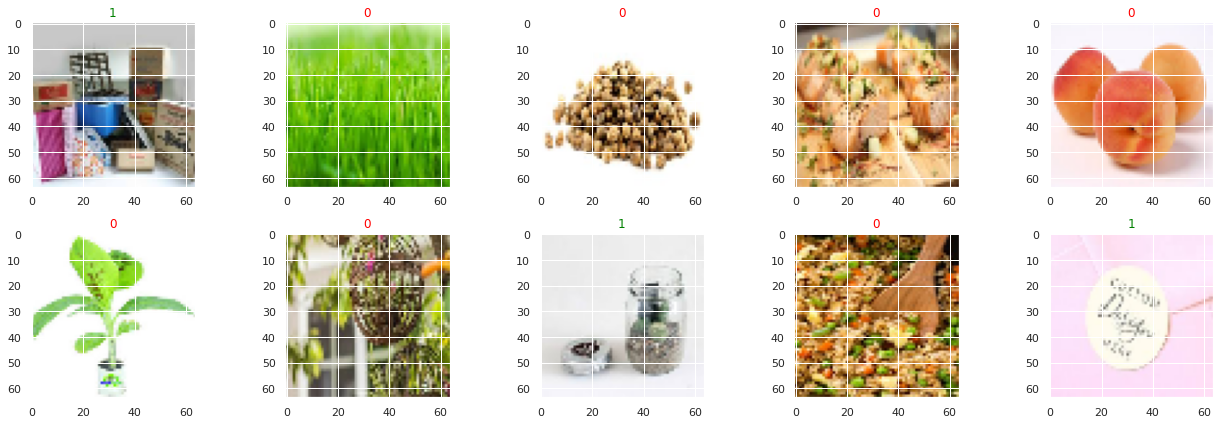

In [ ]:
#Visualizar imagenes ordinarias y reciclabes
fig = plt.figure(figsize = (18,6))
index = 1
for i in np.random.randint(low = 0, high = X_train.shape[0], size = 10):
    img = X_train[i]
    ax = fig.add_subplot(2, 5, index)
    ax.imshow(img, cmap = 'gray')
    index = index + 1
    color = ['green' if y_train[i] == 1 else 'red'][0]
    ax.set_title(y_train[i], fontsize = 12, color = color)
plt.tight_layout()
plt.show()

In [ ]:
X_train_new

array([[ 14,  37,   2, ..., 255, 255, 255],
       [201, 214, 231, ..., 203, 204, 209],
       [ 16,  23,  31, ..., 207, 214, 228],
       ...,
       [255, 255, 255, ...,  17,  18,  36],
       [255, 255, 255, ..., 255, 255, 255],
       [ 52,  52,  52, ...,  39,  39,  39]], dtype=uint8)

### Visualización de imagen en el espacio de color RGB

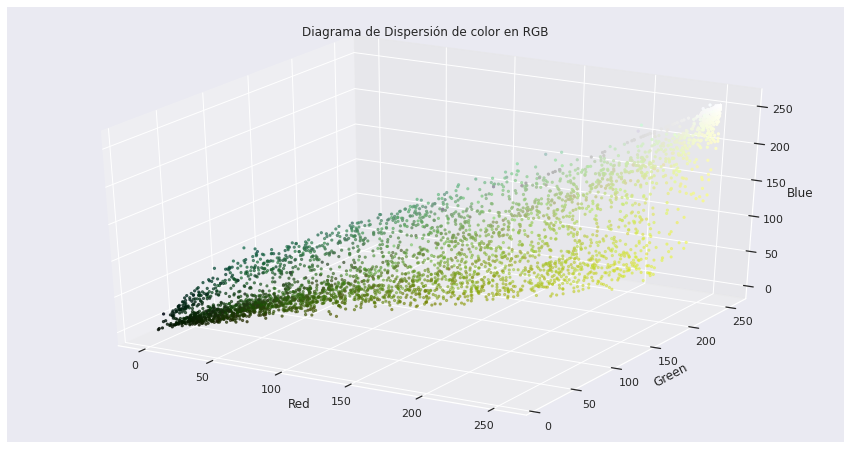

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

image = (X_train[0,:,:,:])

r, g, b = cv2.split(image)
fig = plt.figure(figsize=(15, 8))
axis = fig.add_subplot(1, 1, 1, projection="3d")

#Normalizar
pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# Trazar las posiciones de los píxeles para cada eje y sus colores correspondientes
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_title("Diagrama de Dispersión de color en RGB")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

## Análisis Exploratorio de Datos - EDA

Se realiza un análisis exploratorio de datos con Pandas para observar la información de las imágenes, distriubución de color, entre otros

In [ ]:
#Convertir de un numpy a pandas X_train_new
pixel = []
for i in range(X_train_new.shape[1]):
    pixel.append('pixel_{}'.format(i))

X_train_df = pd.DataFrame(X_train_new,columns=pixel)
X_train_df['tipo_residuo'] = y_train
X_train_df.index.name='image'
X_train_df

pixel_0  pixel_1  pixel_2  ...  pixel_12286  pixel_12287  tipo_residuo
image                             ...                                        
0           14       37        2  ...          255          255             0
1          201      214      231  ...          204          209             0
2           16       23       31  ...          214          228             0
3          240      222      146  ...          255          253             0
4          255      255      255  ...          237          228             0
...        ...      ...      ...  ...          ...          ...           ...
22559       59       60       64  ...          144          147             1
22560      211      246      222  ...          252          250             1
22561      255      255      255  ...           18           36             1
22562      255      255      255  ...          255          255             1
22563       52       52       52  ...           39           39             1

[22564 rows x 12289 columns]

In [ ]:
#Convertir de un numpy a pandas X_test_new
pixel = []
for i in range(X_test_new.shape[1]):
    pixel.append('pixel_{}'.format(i))

X_test_df = pd.DataFrame(X_test_new,columns=pixel)
X_test_df['tipo_residuo'] = y_test
X_test_df.index.name='image'
X_test_df

pixel_0  pixel_1  pixel_2  ...  pixel_12286  pixel_12287  tipo_residuo
image                             ...                                        
0           52       54       67  ...           50           66             0
1          174       84       18  ...            9            7             0
2          255      255      255  ...          255          255             0
3          219      219      219  ...          232          232             0
4          255      255      255  ...          255          255             0
...        ...      ...      ...  ...          ...          ...           ...
2508       255      255      255  ...          255          255             1
2509       243      238      238  ...          243          244             1
2510       184      176      166  ...           56           41             1
2511       199      200      184  ...           45           35             1
2512       254      254      254  ...          255          255             1

[2513 rows x 12289 columns]

In [ ]:
#Se imprime un describe que muestra la estadísticas de las imágenes
X_train_df.describe()

pixel_0       pixel_1  ...   pixel_12287  tipo_residuo
count  22564.000000  22564.000000  ...  22564.000000  22564.000000
mean     184.485508    180.727796  ...    164.323436      0.443140
std       82.369392     83.238780  ...     93.510360      0.496767
min        0.000000      0.000000  ...      0.000000      0.000000
25%      126.000000    117.000000  ...     72.000000      0.000000
50%      223.000000    216.000000  ...    199.000000      0.000000
75%      255.000000    255.000000  ...    255.000000      1.000000
max      255.000000    255.000000  ...    255.000000      1.000000

[8 rows x 12289 columns]

In [ ]:
samples,features = X_train_df.shape

duplicated = X_train_df.duplicated().sum()
null_values = X_train_df.isnull().sum().sum()

print('DATOS BASICOS EDA')
print('Número de imágenes: %d'%(samples))
print('Número de caracteristicas: %d'%(features))
print('Número de valores duplicados: %d'%(duplicated))
print('Número de muestras nulas: %d' % (null_values))


DATOS BASICOS EDA
Número de imágenes: 22564
Número de caracteristicas: 12289
Número de valores duplicados: 40
Número de muestras nulas: 0


In [ ]:
#Distribución de los datos
X_train_df['tipo_residuo'].value_counts()

0    12565
1     9999
Name: tipo_residuo, dtype: int64

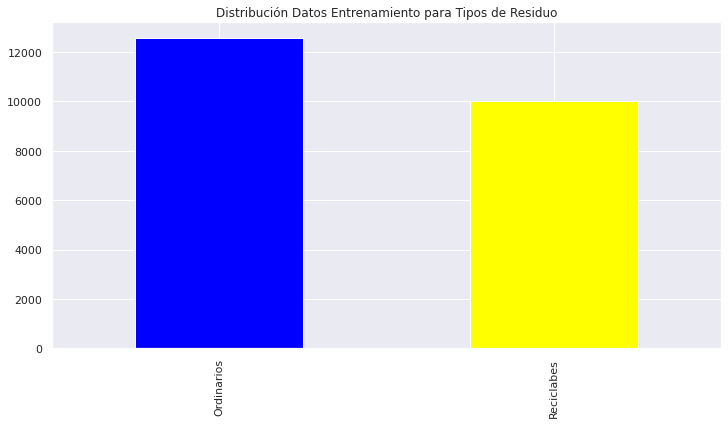

In [ ]:
#Verificar graficamente la distribución de los datos
plt.figure(figsize=(12,6))
logpatterns_counts = X_train_df['tipo_residuo'].value_counts().sort_index()
patterns_colors = ['Blue','Yellow']
patterns_labels = ['Ordinarios', 'Reciclabes']
#use facies labels to index each count
logpatterns_counts.index = patterns_labels

logpatterns_counts.plot(kind='bar',color=patterns_colors, 
                         title='Distribución Datos Entrenamiento para Tipos de Residuo')
logpatterns_counts
plt.savefig(fname=BASE_DIR_GRA +"/distribución de los datos"+fecha_hora()+".png")  
plt.show()

In [ ]:
#Distribución de los datos con las etiquetas
logpatterns_counts

Ordinarios    12565
Reciclabes     9999
Name: tipo_residuo, dtype: int64

**Lo que sabemos hasta ahora**
- Nuestro conjunto de datos contiene una cantidad razonable de imágenes.
- No se requiere limpieza de datos
- El análisis exploratorio de datos se realiza con respecto a los metadatos, ya  que no tenemos información adicional.
- Los datos están desbalanceados, el 55% de los datos pertenecen a la clase "Ordinarios" y el 45% a la clase "Reciclabes"
- Debido al desequilibrio de datos, es mejor utilizar métricas como Precision, Recall o F1-Score para medir el rendimiento del modelo.

In [ ]:
#El siguiente ejercicio es para definir unas muestras de imágnes de lo data Train y Test para efecto de práctica, pero no se aplica en los modelos.

# Tomar X imagénes de amabas categorias

from sklearn.utils import shuffle

SAMPLE_SIZE = 5000
# take a random sample of class 0 with size equal to num samples in class 1
df_0 = X_train_df[X_train_df['tipo_residuo'] == 0].sample(SAMPLE_SIZE, random_state = 0)
# filter out class 1
df_1 = X_train_df[X_train_df['tipo_residuo'] == 1].sample(SAMPLE_SIZE, random_state = 0)

# concat the dataframes
df_muestra_train = pd.concat([df_0, df_1], axis = 0).reset_index(drop = True)
# shuffle
df_muestra_train = shuffle(df_muestra_train)

df_muestra_train['tipo_residuo'].value_counts()

1    5000
0    5000
Name: tipo_residuo, dtype: int64

### Datos de imagen EDA
En esta sección, se presenta un EDA sobre los datos de la imagen. Aquí se investiga cualquier patrón / relación con respecto a las imágenes y sus respectivas clases.

Primero, echemos un vistazo a una muestra aleatoria y extraigamos información básica sobre las imágenes:

In [ ]:
X_train_new[0:]

array([[ 14,  37,   2, ..., 255, 255, 255],
       [201, 214, 231, ..., 203, 204, 209],
       [ 16,  23,  31, ..., 207, 214, 228],
       ...,
       [255, 255, 255, ...,  17,  18,  36],
       [255, 255, 255, ..., 255, 255, 255],
       [ 52,  52,  52, ...,  39,  39,  39]], dtype=uint8)

En una imagen RGB, cada píxel está representado por tres números de 8 bits asociados con los valores de rojo, verde y azul, respectivamente. Los números van de 0 a 255 para los tres canales diferentes.

El conjunto de datos presenta las imágenes como .JPG. Usando la biblioteca cv2, el color de las imágenes se muestra correctamente.

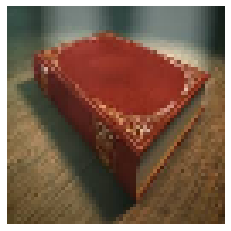

In [ ]:
plt.figure()
pic_id = random.randrange(0, samples)
image = X_train[pic_id,:,:,:]
plt.imshow(image)
plt.axis('off');
plt.show()  

Comprobación de los parámetros básicos de la imagen

In [ ]:
print('Forma de la imagen : {}'.format(image.shape))
print('Altura de la imagen {}'.format(image.shape[0]))
print('Ancho de la imagen {}'.format(image.shape[1]))
print('Dimensiones de la imagen {}'.format(image.ndim))
print('Tamaño de la imagen {}'.format(image.size))
print('Tipo de dato de imagen {}'.format(image.dtype))
print('Valor máximo de RGB de la imagen {}'.format(image.max()))
print('Valor mínimo de RGB de la imagen {}'.format(image.min()))

Forma de la imagen : (64, 64, 3)
Altura de la imagen 64
Ancho de la imagen 64
Dimensiones de la imagen 3
Tamaño de la imagen 12288
Tipo de dato de imagen uint8
Valor máximo de RGB de la imagen 242
Valor mínimo de RGB de la imagen 0


Las imágenes presentan los tres canales.


In [ ]:
#La salida a continuación es un píxel único de la matriz de imágenes en [0,0], vemos que todos los canales de color tienen diferentes valores.
image[0,0]

array([48, 71, 63], dtype=uint8)

Como se mostró hasta ahora, las imágenes no son más que una matriz de números en un formato [Alto, Ancho, Canal]. Con eso en mente, procedemos con nuestra EDA.

Aquí comenzamos a examinar si existe algún patrón entre los valores de color de la imagen y su clase. Una gráfica de distribución ilustra cómo se presentan los valores de color medio, máximo y mínimo para el conjunto de datos. 

In [ ]:
mean_val = []
std_dev_val = []
max_val = []
min_val = []

for i in range(0,samples):    
    mean_val.append(X_train[i].mean())
    std_dev_val.append(np.std(X_train[i]))
    max_val.append(X_train[i].max())
    min_val.append(X_train[i].min())

imageEDA = X_train_df.loc[:,['tipo_residuo']]
imageEDA['mean'] = mean_val
imageEDA['stedev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

subt_mean_samples = imageEDA['mean'].mean() - imageEDA['mean']
imageEDA['subt_mean'] = subt_mean_samples

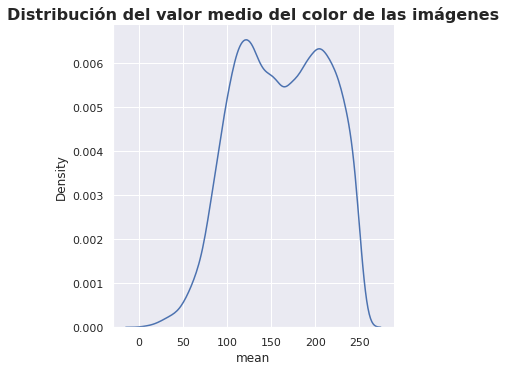

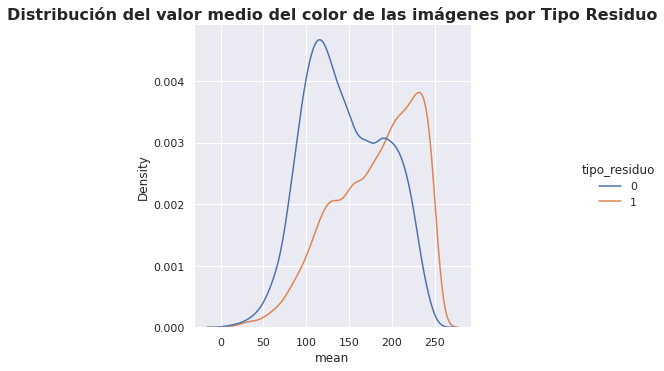

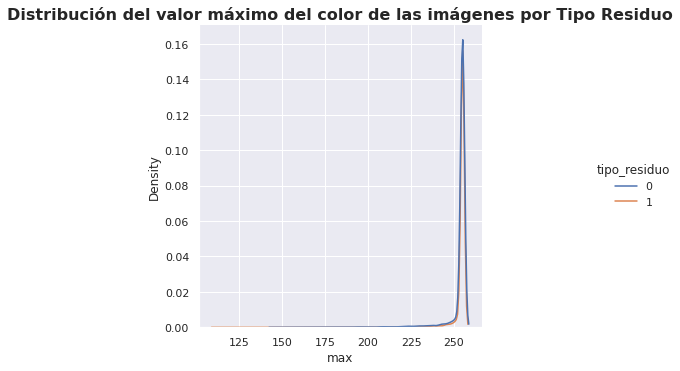

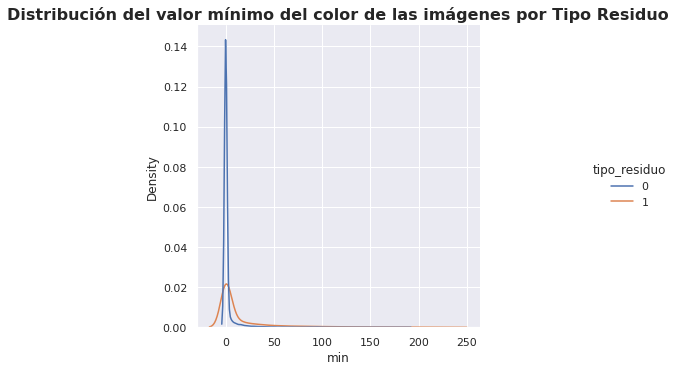

In [ ]:
ax = sns.displot(data = imageEDA, x = 'mean', kind="kde");
plt.title('Distribución del valor medio del color de las imágenes', fontsize = 16,weight = 'bold');
plt.savefig(fname=BASE_DIR_GRA +"/Distribución del valor medio del color de las imágenes"+fecha_hora()+".png") 

ax = sns.displot(data = imageEDA, x = 'mean', kind="kde", hue = 'tipo_residuo');
plt.title('Distribución del valor medio del color de las imágenes por Tipo Residuo', fontsize = 16,weight = 'bold');
plt.savefig(fname=BASE_DIR_GRA +"/Distribución del valor medio del color de las imágenes por Tipo Residuo"+fecha_hora()+".png") 


ax = sns.displot(data = imageEDA, x = 'max', kind="kde", hue = 'tipo_residuo');
plt.title('Distribución del valor máximo del color de las imágenes por Tipo Residuo', fontsize = 16,weight = 'bold');
plt.savefig(fname=BASE_DIR_GRA +"/Distribución del valor máximo del color de las imágenes por Tipo Residuo"+fecha_hora()+".png")  

ax = sns.displot(data = imageEDA, x = 'min', kind="kde", hue = 'tipo_residuo');
plt.title('Distribución del valor mínimo del color de las imágenes por Tipo Residuo', fontsize = 16,weight = 'bold');
plt.savefig(fname=BASE_DIR_GRA +"/Distribución del valor mínimo del color de las imágenes por Tipo Residuo"+fecha_hora()+".png")  

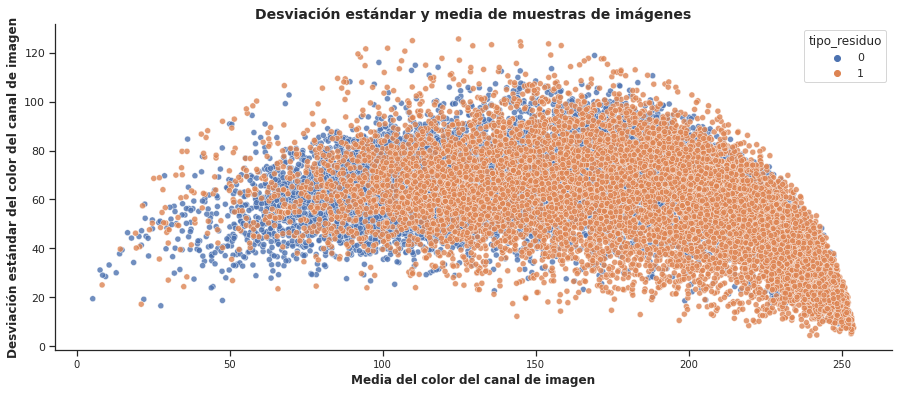

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="ticks", font_scale = 1)
ax = sns.scatterplot(data=imageEDA, x="mean", y=imageEDA['stedev'], hue = 'tipo_residuo',alpha=0.8);
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=0,fontsize = 10)
ax.set_xlabel('Media del color del canal de imagen',fontsize = 12,weight = 'bold')
ax.set_ylabel('Desviación estándar del color del canal de imagen',fontsize = 12,weight = 'bold')
plt.title('Desviación estándar y media de muestras de imágenes', fontsize = 14,weight = 'bold')
plt.savefig(fname=BASE_DIR_GRA +"/Mean and Standard Deviation of Image Samples"+fecha_hora()+".png") 


<Figure size 1080x432 with 0 Axes>

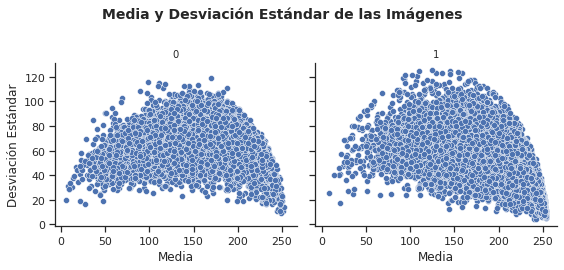

In [ ]:
plt.figure(figsize=(15,6));
patterns_labels = ['Ordinarios', 'Reciclabes']
g = sns.FacetGrid(imageEDA, col="tipo_residuo",height=4);
g.map_dataframe(sns.scatterplot, x='mean', y='stedev');
g.set_titles(col_template="{col_name}", row_template="{row_name}", size = 10)
g.fig.subplots_adjust(top=.2)
g.fig.suptitle('Media y Desviación Estándar de las Imágenes',fontsize=14, weight = 'bold')
axes = g.axes.flatten()
axes[0].set_ylabel('Desviación Estándar');
for ax in axes:
    ax.set_xlabel('Media')
g.fig.tight_layout()
plt.savefig(fname=BASE_DIR_GRA +"/Media y Desviación Estándar de las Imágenes"+fecha_hora()+".png")  

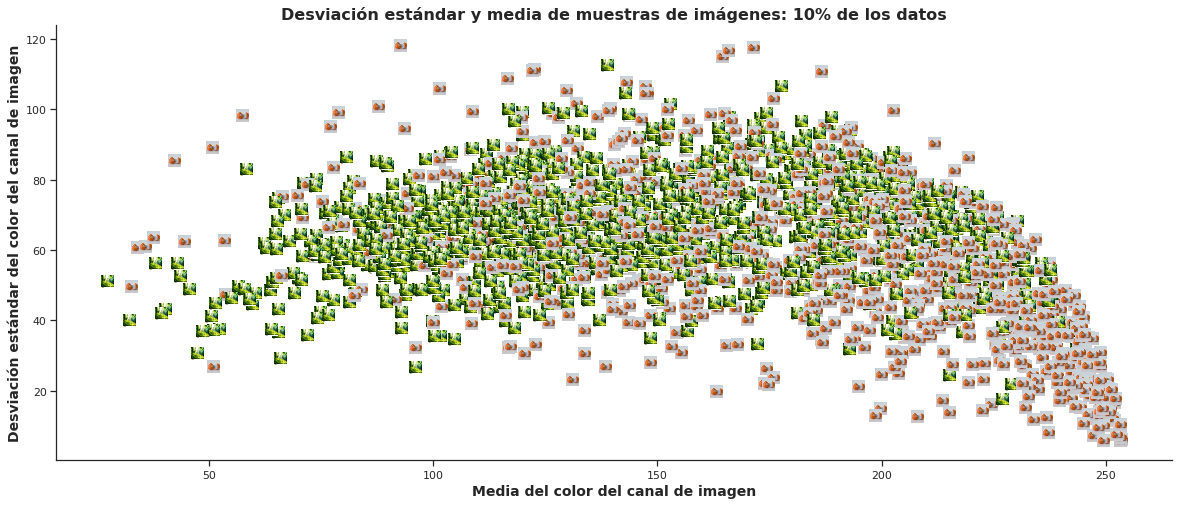

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(X_train[path],zoom = 0.2)

DF_sample = imageEDA.sample(frac=0.1, replace=False, random_state=1)
paths = DF_sample['tipo_residuo']

fig, ax = plt.subplots(figsize=(20,8))
ab = sns.scatterplot(data=DF_sample, x="mean", y='stedev')
sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Media del color del canal de imagen',fontsize = 14,weight = 'bold')
ax.set_ylabel('Desviación estándar del color del canal de imagen',fontsize = 14,weight = 'bold')
plt.title('Desviación estándar y media de muestras de imágenes: 10% de los datos', fontsize = 16,weight = 'bold');

for x0, y0, path in zip(DF_sample['mean'], DF_sample['stedev'],paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.savefig(fname=BASE_DIR_GRA +"/Mean and Standard Deviation of Image Samples - 10 of Data"+fecha_hora()+".png")  

##Balanceo de Datos

Se realiza ejercio academécio donde se indaga como balancear los datos y se encuentra que existen el sobremuestreo, submuestreo y Sobremuestreo + Submuestreo, pero la información arroja no es usada en los modelos.


In [ ]:
#Se crea una variable targe con los datos de Pandas para el balanceo de los datos.
target = X_train_df['tipo_residuo']

Reciclable = target.sum()
Ordinario = target.shape[0]- Reciclable
print('Residuos Ordinarios ', Ordinario, ' , Residuos Reciclables: ', Reciclable )

Residuos Ordinarios  12565  , Residuos Reciclables:  9999


###Sobremuestreo

In [ ]:
#Importamos los paquetes
from imblearn.over_sampling import RandomOverSampler, SMOTE

#Inicialización de los métodos de sobremuestreo
#ROS
ros = RandomOverSampler()#random_state = 0
#SMOTE
smote = SMOTE()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Este balanceo se ejecuta rapidamente sin consumir mucha memoria RAM

In [ ]:
#ROS. Duplica muestras de la clase menos representadas
dataRos, targetRos = ros.fit_resample(X_train_df,target)
OrdinarioRos = targetRos.sum()
OrdinarioRos = targetRos.shape[0]- OrdinarioRos
print('Residuos Ordinarios: ', OrdinarioRos, ' , Residuos Reciclables: ', OrdinarioRos )
dataRos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Residuos Ordinarios:  12565  , Residuos Reciclables:  12565


array([[ 14,  37,   2, ..., 255, 255,   0],
       [201, 214, 231, ..., 204, 209,   0],
       [ 16,  23,  31, ..., 214, 228,   0],
       ...,
       [255, 255, 255, ..., 255, 255,   1],
       [255, 255, 255, ..., 255, 255,   1],
       [197, 191, 193, ..., 168, 166,   1]])

Este proceso demanda mucho tiempo y tiene un alto consumo de memoria RAM (No se puede procesar toda la data)

In [ ]:
#SMOTE. Genera nuevas muestras sintéticas
dataSmote, targetSmote = smote.fit_resample(X_train_df,target)
OrdinarioSmote = targetSmote.sum()
reciclableSmote = targetSmote.shape[0]- OrdinarioSmote
print('Residuos Ordinarios: ', OrdinarioSmote, ' , Residuos Reciclables: ', reciclableSmote )
dataSmote

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


###Submuestreo

In [ ]:
#Importamos los paquetes
from imblearn.under_sampling import RandomUnderSampler, NearMiss

#Inicialización de los métodos de submuestreo
#RUS
rus = RandomUnderSampler()#random_state = 0
#NearMiss
nm = NearMiss()

In [ ]:
#RUS. Elimina muestras de la clase más representada aleatoriamente
dataRus, targetRus = rus.fit_resample(X_train_df,target)
ReciclableRus = targetRus.sum()
OrdinarioRus = targetRus.shape[0]- ReciclableRus
print('Residuos Ordinarios: ', OrdinarioRus, ' , Residuos Reciclables: ', ReciclableRus )
dataRus

In [ ]:
#NearMiss. Elimina las muestras más cercanas de la clase más representada
dataNm, targetNm = nm.fit_resample(X_train_df,target)
OrdinarioNm = targetNm.sum()
ReciclableNm = targetNm.shape[0]- OrdinarioNm
print('Residuos Ordinarios: ', OrdinarioNm, ' , Residuos Reciclables: ', ReciclableNm )
dataNm

###Sobremuestreo + Submuestreo

In [ ]:
from imblearn.combine import SMOTETomek

#Inicialización del método combinado
#SMOTE Tomek (Uniones de tomek)
smoteT = SMOTETomek()#random_state = 0

In [ ]:
#Smote-Tomek. Sobremuestreo con Smote seguido de un submuestreo con Uniones de Tomek
datasmoteT, targetsmoteT = smoteT.fit_resample(X_train_df,target)
OrdinariomoteT = targetsmoteT.sum()
ReciclablemoteT = targetsmoteT.shape[0]- OrdinariomoteT
print('Residuos Ordinarios:', OrdinariomoteT, ' , T Residuos Reciclables: ', ReciclablemoteT )
datasmoteT

## Selección de Caracteristicas (Contraste - Brillo - Difuminar)

En este notebook no se usan estas características para ejecución del modelo con los algoritmos de ML y DL

In [ ]:
import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
def show_image_mosaic(imgs, labels, figsize=(12, 12), idxs=None):

    plt.figure(figsize=figsize)
    for labi,lab in [i for i in enumerate(np.unique(labels))]:
        k = imgs[labels == lab]
        _idxs = idxs[:10] if idxs is not None else np.random.permutation(len(k))[:10]
        for i, idx in enumerate(_idxs):
            if i == 0:
                plt.subplot(10, 11, labi*11+1)
                plt.title("LABEL %d" % lab)
                plt.plot(0, 0)
                plt.axis("off")

            img = k[idx]
            plt.subplot(10, 11, labi*11+i+2)
            plt.imshow(img, cmap=plt.cm.Greys_r)
            plt.axis("off")
    plt.savefig(fname=BASE_DIR_GRA +"/show_image_mosaic"+fecha_hora()+".png")            

In [ ]:
def show_change(img, arr_antes, arr_despues, cambio):
  plt.subplot(121),plt.imshow(arr_antes[img,:,:,:]),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(arr_despues[img,:,:,:]),plt.title(str(cambio))
  plt.xticks([]), plt.yticks([])
  plt.savefig(fname=BASE_DIR_GRA +"/show_change"+fecha_hora()+".png")  
  plt.show()

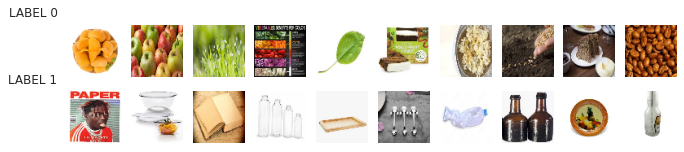

In [ ]:
show_image_mosaic(X_train, y_train)

### Aumento de Contraste

Realizamos ahora una transformación sencilla sobre las imágenes usando las herramientas de TF

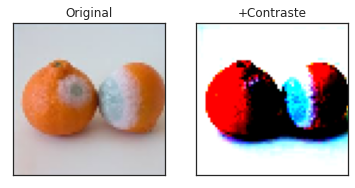

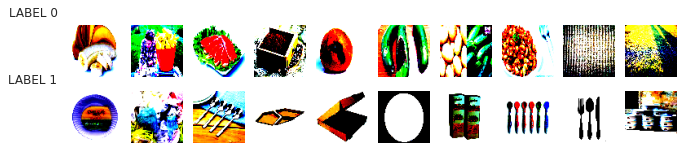

In [ ]:
tf.compat.v1.disable_eager_execution()

timgs = tf.compat.v1.placeholder(dtype=tf.uint8, shape=(None,64,64,3))
cimgs = tf.image.adjust_contrast(timgs, 10.)

with tf.compat.v1.Session() as sess:  
  cx_train = sess.run(cimgs, feed_dict={timgs: X_train})
  cx_test = sess.run(cimgs, feed_dict={timgs: X_test})

show_change(1, X_train, cx_train, '+Contraste')
show_image_mosaic(cx_train, y_train)

In [ ]:
cx_train.shape, cx_test.shape, 

((22564, 64, 64, 3), (2513, 64, 64, 3))

### Aumentar brillo

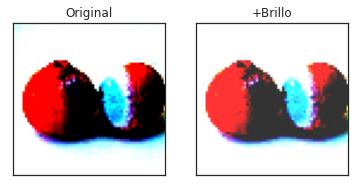

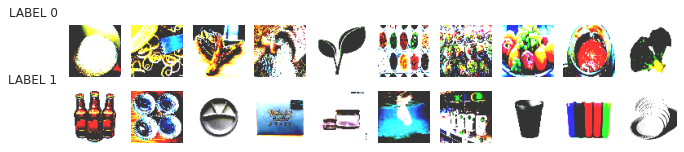

In [ ]:
tf.compat.v1.disable_eager_execution()

timgs = tf.compat.v1.placeholder(dtype=tf.uint8, shape=(None,64,64,3))
cimgs = tf.image.adjust_brightness(timgs, delta=0.2)

with tf.compat.v1.Session() as sess:  
  bx_train = sess.run(cimgs, feed_dict={timgs: cx_train})
  bx_test = sess.run(cimgs, feed_dict={timgs: cx_test})

show_change(1, cx_train, bx_train, '+Brillo')
show_image_mosaic(bx_train, y_train)

In [ ]:
bx_train.shape, bx_test.shape

((22564, 64, 64, 3), (2513, 64, 64, 3))

### Quitar ruido (Difuminar)

In [ ]:
#funcion para blurear
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def get_blur (imgs_input):
  imgs_output = []

  for img in imgs_input:
    img_blur = cv.blur(img,(3,3))
    imgs_output.append(img_blur)
  
  return np.asarray(imgs_output)

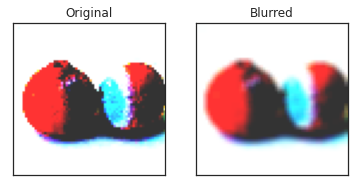

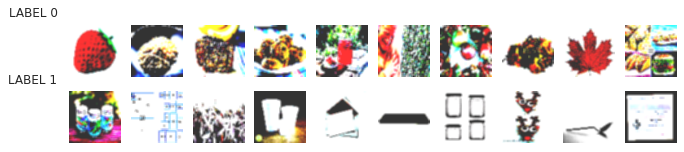

In [ ]:
#Obtener imagenes con desefoque

rx_train = get_blur(bx_train)
rx_test = get_blur(bx_test)

show_change(1, bx_train, rx_train, 'Blurred')
show_image_mosaic(rx_train, y_train)

In [ ]:
rx_train.shape, rx_test.shape

((22564, 64, 64, 3), (2513, 64, 64, 3))

### Detección de borde

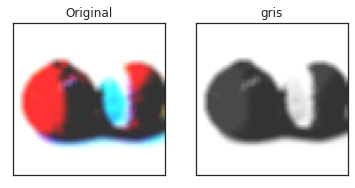

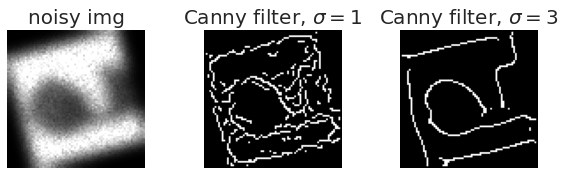

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
from skimage.feature import greycomatrix, greycoprops
import cv2


#convertit imagen a escala de grises
img = rx_train[1,:,:,:] 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.subplot(121),plt.imshow(rx_train[1,:,:,:] ),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap='gray', vmin = 0, vmax = 255),plt.title('gris')
plt.xticks([]), plt.yticks([])
plt.show()

# Generate noisy image of a square
img = ndi.rotate(img, 15, mode='constant')
img = ndi.gaussian_filter(img, 4)
img = random_noise(img, mode='speckle', mean=0.1)



# Compute the Canny filter for two values of sigma
edges1 = feature.canny(img)
edges2 = feature.canny(img, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('noisy img', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.savefig(fname=BASE_DIR_GRA +"/Deteccion_bordes"+fecha_hora()+".png")  
plt.show()

### Segmentación a escala a grises


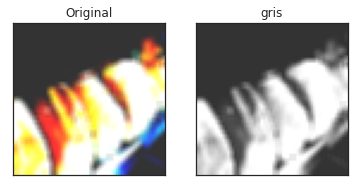

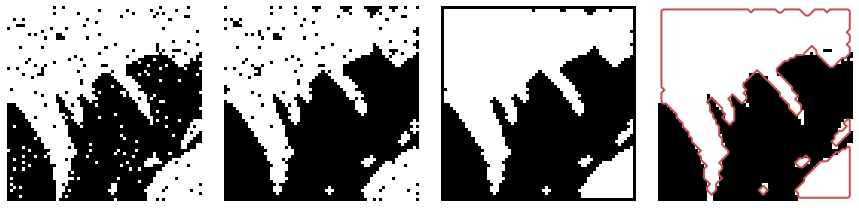

In [ ]:
from scipy import ndimage
import matplotlib.pyplot as plt
import sklearn.mixture

#convertit imagen a escala de grises
img = rx_train[1114,:,:,:] 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.subplot(121),plt.imshow(rx_train[1114,:,:,:] ),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap='gray', vmin = 0, vmax = 255),plt.title('gris')
plt.xticks([]), plt.yticks([])
plt.show()


n = 10
l = 256

img = ndimage.gaussian_filter(img, sigma=1/(4.*n))

mask = (img < img.mean()).astype(np.float)


img = mask + 0.3*np.random.randn(*mask.shape)

binary_img = img > 0.5

# Remove small white regions
open_img = ndimage.binary_opening(binary_img)
# Remove small black hole
close_img = ndimage.binary_closing(open_img)





plt.figure(figsize=(12, 3))

plt.subplot(141)
plt.imshow(binary_img[:l, :l], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(142)
plt.imshow(open_img[:l, :l], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(143)
plt.imshow(close_img[:l, :l], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(144)
plt.imshow(mask[:l, :l], cmap=plt.cm.gray)
plt.contour(close_img[:l, :l], [0.5], linewidths=2, colors='r')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.savefig(fname=BASE_DIR_GRA +"/Segmentación_Grises"+fecha_hora()+".png")  
plt.show()

### Alargar imágenes

In [ ]:
# REVISAR!!!!!!!!!! Asignar imagenes preporcesadas y aplanarlas
#Obtener muestras de cada etiqueta (Imágenes a color en tres canales)
nsamples, nx, ny, ncha = rx_train.shape
nsamples2, nx2, ny2, ncha2 = rx_test.shape
X_train_new_rx = rx_train.reshape((nsamples,nx*ny*ncha)) # Alargar la imagen
X_test_new_rx = rx_test.reshape((nsamples2,nx2*ny2*ncha2))

#Colocar bien la etiqueta (O:Ordinarios --> 0, R:Reciclabes --> 1)
encoder = LabelEncoder() #Transformación de las etiquetas de letra a números.
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

X_train_new_rx.shape, X_test_new_rx.shape, y_train.shape, y_test.shape

((22564, 12288), (2513, 12288), (22564,), (2513,))

## Selección de Caracteristicas Importantes (**ESTO NO VA**)

Se realiza el proceso de seleccionar las características más importantes como parte de aplicar los conocimientos vistos en la materia de IA, pero esta información no es usada para la aplicación de los modelos.

Se trabaja con los datos de X_train y X_test convertidos a un dataframe de Panda

In [ ]:
#Se elimina columna del target para X_train y X_test
X_train_df = X_train_df.drop(['tipo_residuo'],axis=1)
X_test_df = X_test_df.drop(['tipo_residuo'],axis=1)


In [ ]:
import lightgbm as lgb

# Inicializar una matriz vacía para mantener la importancia de las características
feature_importances = np.zeros(X_train_df.shape[1])

# Crea el modelo con varios hiperparámetros
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [ ]:
# Entrenar el modelo
    
# Entrene con parada anticipada
model.fit(X_train_df, y_train, early_stopping_rounds=100, eval_set = [(X_test_df, y_test)], eval_metric = 'binary_logloss', verbose = 1)

# Registre la importancia de las características
feature_importances += model.feature_importances_

In [ ]:
model.score(X_test_df, y_test)

In [ ]:
# ¡Asegúrese de promediar la importancia de las funciones!
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X_train_df.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

print(feature_importances)

In [ ]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (12, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [ ]:
# Encontrar las características con importancia cero
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

Bueno, también parece que muchas de las características que hicimos tienen literalmente cero importancia. Para la máquina de aumento de gradiente, las características con importancia 0 no se utilizan en absoluto para realizar divisiones. Por lo tanto, podemos eliminar estas características del modelo sin afectar el rendimiento (excepto para un entrenamiento más rápido).

In [ ]:
Xfi_Train = X_train_df.drop(columns = zero_features)
Xfi_Test = X_test_df.drop(columns = zero_features)

print('Training shape: ', Xfi_Train.shape)
print('Testing shape: ', Xfi_Test.shape)

En este punto, podemos volver a ejecutar el modelo para ver si identifica más características con importancia cero. En cierto modo, estamos implementando nuestra propia forma de eliminación de características recursivas.

In [ ]:
def identify_zero_importance_features(train, train_labels, iterations = 2):
    """
    Identify zero importance features in a training dataset based on the 
    feature importances from a gradient boosting model. 
    
    Parameters
    --------
    train : dataframe
        Training features
        
    train_labels : np.array
        Labels for training data
        
    iterations : integer, default = 2
        Number of cross validation splits to use for determining feature importances
    """
    
    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(train.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')
    
    # Fit the model multiple times to avoid overfitting
    for i in range(iterations):

        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
                  eval_metric = 'binary_logloss', verbose = 200)

        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations
    
    feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

In [ ]:
#Ejectución de función de características importantes
second_round_zero_features, feature_importances = identify_zero_importance_features(Xfi_Train, y_train)

In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)

Podemos mantener solo las características necesarias para un 95% de importancia. Este paso me parece que tiene la mayor posibilidad de dañar la capacidad de aprendizaje del modelo, por lo que en lugar de cambiar el conjunto de datos original, haremos copias más pequeñas. Luego, podemos probar ambas versiones de los datos para ver si vale la pena el paso de eliminación de la función adicional.

In [ ]:
# Threshold for cumulative importance
threshold = 0.95

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
X_train_small = X_train_df[features_to_keep]
X_test_small = X_test_df[features_to_keep]

print(X_train_small.shape,X_test_small.shape)

In [ ]:
X_train_small

## Escalar de Información

In [ ]:
#Escalar la data original
scaler = preprocessing.StandardScaler().fit(X_train_new)
X_train_scaled = scaler.transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

X_train_new.shape,X_test_new.shape, X_train_scaled.shape, X_test_scaled.shape

((22564, 12288), (2513, 12288), (22564, 12288), (2513, 12288))

In [ ]:
X_train_scaled

array([[-2.06981357, -1.72673099, -1.85685814, ...,  0.90242477,
         0.94637176,  0.96971687],
       [ 0.20049751,  0.39972884,  0.65090801, ...,  0.28337127,
         0.35016717,  0.47778187],
       [-2.04553217, -1.89492556, -1.53928077, ...,  0.33099077,
         0.46707003,  0.68097241],
       ...,
       [ 0.85609536,  0.89229863,  0.91373066, ..., -1.93093549,
        -1.82422602, -1.37232152],
       [ 0.85609536,  0.89229863,  0.91373066, ...,  0.90242477,
         0.94637176,  0.96971687],
       [-1.60846694, -1.54652253, -1.30931094, ..., -1.66902824,
        -1.57873002, -1.3402388 ]])

In [ ]:
#Escalar la data con imágenes procesadas
scaler = preprocessing.StandardScaler().fit(X_train_new_rx)
X_train_scaled_rx = scaler.transform(X_train_new_rx)
X_test_scaled_rx = scaler.transform(X_test_new_rx)

X_train_new_rx.shape,X_test_new_rx.shape, X_train_scaled_rx.shape, X_test_scaled_rx.shape

((22564, 12288), (2513, 12288), (22564, 12288), (2513, 12288))

In [ ]:
X_train_scaled_rx

array([[-1.66563028, -1.70142772, -1.67637335, ...,  0.76460093,
         0.76064941,  0.76639558],
       [ 0.69578156,  0.68201305,  0.6893985 , ...,  0.76460093,
         0.76064941,  0.76639558],
       [-1.66563028, -1.70142772, -1.67637335, ...,  0.76460093,
         0.76064941,  0.76639558],
       ...,
       [ 0.69578156,  0.68201305,  0.6893985 , ..., -1.52116032,
        -1.5272409 , -1.51064042],
       [ 0.69578156,  0.68201305,  0.6893985 , ...,  0.76460093,
         0.76064941,  0.76639558],
       [-1.66563028, -1.70142772, -1.67637335, ..., -1.52116032,
        -1.5272409 , -1.51064042]])

##Reducción de Dimensionalidad

Se realiza uan reducción de dimensionalidad con PCA el cual se aplica en lso modelos, pero para efectos de aplciación de conocimiento se realiza ejercio con Autoencoders y TSNE.

La Finalidad de ejecutar reducción de dimensionalidad es tener data con la mejor información, con los datos más importantes sin redundancia e eliminar ruido.

### PCA

####  Determinar numéro componentes

Se ejecuta un pipeline para determinar el número de componenetes necesarios para alcanzar una varianza del 95%

In [ ]:
#muestra_ytrain = int(y_train.shape[0]*0.75)
muestra_ytrain = int(y_train.shape[0])

y_train_new2 = y_train[:muestra_ytrain]
X_train_pca.shape, y_train.shape,X_test_pca.shape, X_train_pca[:,0].shape, X_train_pca[:,1].shape, y_train_new2.shape

((6768, 6768), (6768,), (753, 6768), (6768,), (6768,), (6768,))

In [ ]:
muestra_train = int(X_train_new.shape[0]*0.75)
muestra_test = int(X_test_new.shape[0]*0.75)

X_train_new2 = X_train_new[:muestra_train]
X_test_new2 = X_test_new[:muestra_test]
X_train_new2.shape,X_test_new2.shape

((16923, 12288), (1884, 12288))

In [ ]:
from sklearn.decomposition import PCA
#from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Make a pipeline with imputation and pca

pipeline = Pipeline(steps = [('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
             ('pca', PCA())])


# Fit and transform on the training data
t0 = time()
X_train_pca = pipeline.fit_transform(X_train_scaled_rx)

# transform the testing data
X_test_pca = pipeline.transform(X_test_scaled_rx)
print("done transform in %0.3fs" % (time() - t0))

done transform in 522.223s


In [ ]:
X_train_pca.shape, X_test_pca.shape, X_train_new.ndim, X_test.ndim

((6768, 6768), (753, 6768), 2, 4)

In [ ]:
X_train_pca[0:10,:]

array([[-3.38059474e+01, -1.55015499e+01, -6.98725841e-01, ...,
         1.34514745e-22,  7.72524604e-24,  6.12041978e-25],
       [ 1.16912639e+00,  2.63045027e+01,  2.87710228e+01, ...,
         1.34514746e-22,  7.72524632e-24,  6.12042182e-25],
       [ 3.52903548e+01,  1.87671291e+01, -1.54182870e+01, ...,
         1.34514746e-22,  7.72524559e-24,  6.12042244e-25],
       ...,
       [-6.55816449e+01,  4.19316983e+01, -1.85944547e+01, ...,
         1.34514749e-22,  7.72524586e-24,  6.12041694e-25],
       [ 3.83054148e+01, -3.81652346e+01,  4.86286630e+01, ...,
         1.34514750e-22,  7.72524650e-24,  6.12042102e-25],
       [ 2.40850731e+01,  1.99120527e+01,  3.13757814e+01, ...,
         1.34514743e-22,  7.72524645e-24,  6.12041743e-25]])

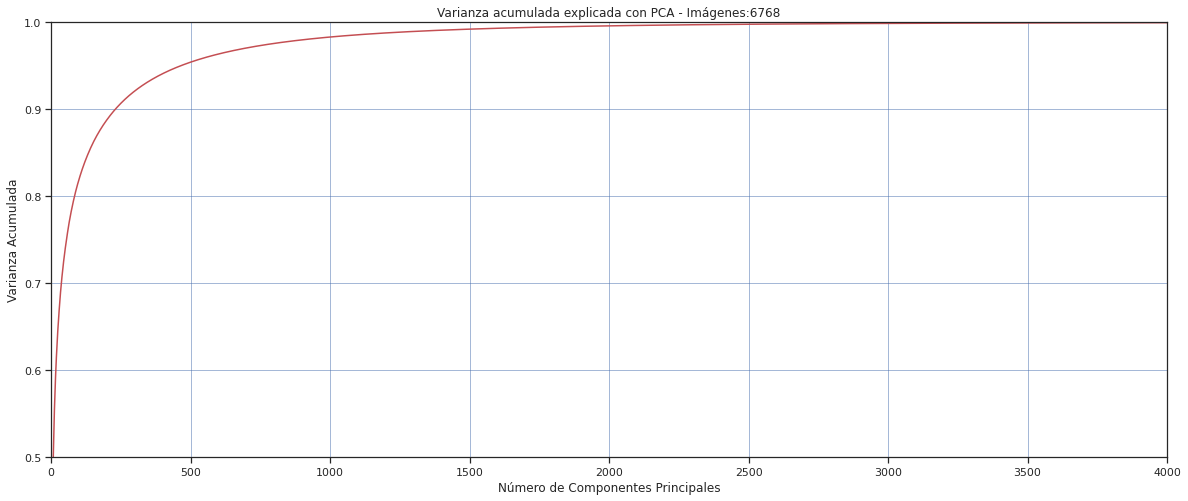

In [ ]:
# Extract the pca object
pca = pipeline.named_steps['pca']

# Plot the cumulative variance explained

plt.figure(figsize = (20, 8))
plt.plot(list(range(X_train_pca.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Número de Componentes Principales'); plt.ylabel('Varianza Acumulada');
plt.title('Varianza acumulada explicada con PCA - Imágenes:'+str(X_train_pca.shape[1]));
plt.ylim(0.5, 1)
plt.xlim(0, 4000)
plt.savefig(fname=BASE_DIR_GRA +"/Varianza_acumulada_PCA "+fecha_hora()+".png")
plt.grid(color='b', linestyle='-', linewidth=0.5)

In [ ]:
print('500 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:500])))

500 principal components account for 95.4207% of the variance.


Solo necesitamos unos pocos componentes principales para dar cuenta de la mayor parte de la varianza en los datos. Podemos utilizar los dos primeros componentes principales para visualizar el conjunto de datos completo. Colorearemos los puntos de datos por el valor del objetivo para ver si el uso de dos componentes principales separa claramente las clases.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


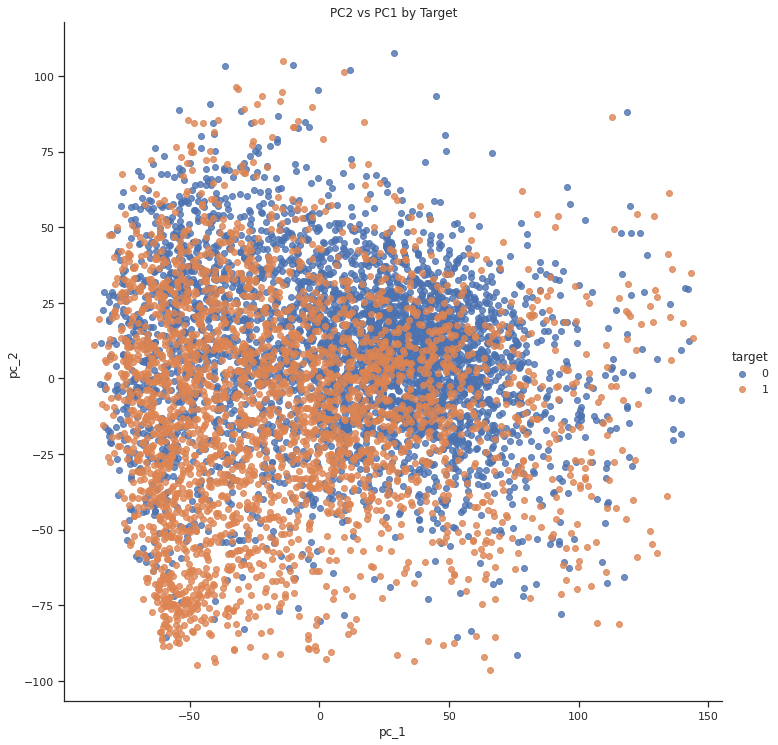

In [ ]:
# Dataframe of pca results
pca_df = pd.DataFrame({'pc_1': X_train_pca[:, 0], 'pc_2': X_train_pca[:, 1], 'target': y_train_new2})

# Plot pc2 vs pc1 colored by target
sns.lmplot('pc_1', 'pc_2', data = pca_df, hue = 'target', fit_reg=False, size = 10)
plt.title('PC2 vs PC1 by Target')
plt.savefig(fname=BASE_DIR_GRA +"/PC2 vs PC1 by Target "+fecha_hora()+".png")

#### Calcular PCA sin Escalar

In [ ]:
#############################################################################
# Calcular un PCA en un conjunto de datos Clasificación de Residuos con data etiquetada
from time import time
n_components = 500

print("Extracción de los %0.2f principales desde %d residuos"
      % (n_components, X_train_new.shape[0]))
t0 = time()
#pca = PCA(n_components=n_components).fit(X_train_new) # usarse cuando es por porcentaje de la varianza
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train_new)
print("done in %0.3fs" % (time() - t0))

print("Proyectar los datos de entrada sobre la base ortonormal de residuos")
t0 = time()
X_train_pca = pca.transform(X_train_new)
X_test_pca = pca.transform(X_test_new)
print("done in %0.3fs" % (time() - t0))


Extracción de los 500.00 principales desde 22564 residuos
done in 128.100s
Proyectar los datos de entrada sobre la base ortonormal de residuos
done in 8.224s


In [ ]:
X_train_pca.shape, X_test_pca.shape

((22564, 500), (2513, 500))

#### Calcular PCA Escalado

In [ ]:
#############################################################################
# Calcular un PCA en un conjunto de datos Clasificación de Residuos con data etiquetada
from time import time
n_components = 500

print("Extracción de los %0.2f principales desde %d residuos"
      % (n_components, X_train_scaled.shape[0]))
t0 = time()
#pca = PCA(n_components=n_components).fit(X_train_new) # Usarse cuando es por porcentaje de la varianza
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train_scaled)
print("done in %0.3fs" % (time() - t0))

print("Proyectar los datos de entrada sobre la base ortonormal de residuos")
t0 = time()
X_train_pca_scaled = pca.transform(X_train_scaled)
X_test_pca_scaled = pca.transform(X_test_scaled)
print("done in %0.3fs" % (time() - t0))


Extracción de los 500.00 principales desde 22564 residuos
done in 127.923s
Proyectar los datos de entrada sobre la base ortonormal de residuos
done in 8.571s


In [ ]:
X_train_pca_scaled.shape, X_test_pca_scaled.shape

((22564, 500), (2513, 500))

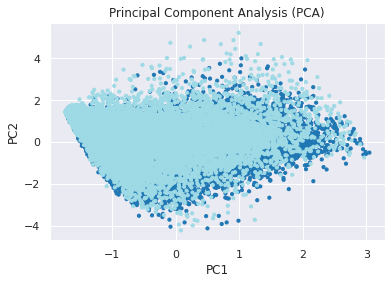

In [ ]:
# REDUCE DIMENSIONS WITH PRINCIPAL COMPONENT ANALYSIS (PCA)

plt.scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], c = y_train, cmap = 'tab20', s = 10)
plt.title('Principal Component Analysis (PCA)')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig(fname=BASE_DIR_GRA +"/Principal Component Analysis (PCA) "+fecha_hora()+".png") 

### Autoencoders

Text(0, 0.5, 'PC2')

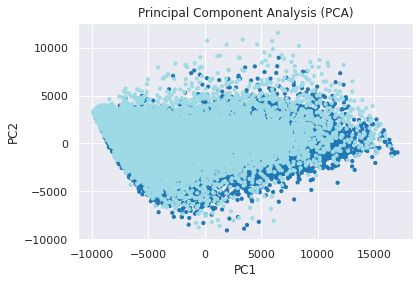

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.optimizers import Adam
from sklearn.decomposition import PCA
from keras.models import Sequential, Model


# REDUCE DIMENSIONS WITH PRINCIPAL COMPONENT ANALYSIS (PCA)
n_input = 500

x_train_auto = PCA(n_components = n_input).fit_transform(X_train_new); y_train = y_train
plt.scatter(x_train_auto[:, 0], x_train_auto[:, 1], c = y_train, cmap = 'tab20', s = 10)
plt.title('Principal Component Analysis (PCA)')
plt.xlabel("PC1")
plt.ylabel("PC2")

Componentes no lineales, más poderoso que PCA

In [ ]:
x_train_auto.shape, X_train_pca.shape, X_test_pca.shape

((22564, 500), (22564, 500), (2513, 500))

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

Text(0, 0.5, 'Dimension 2')

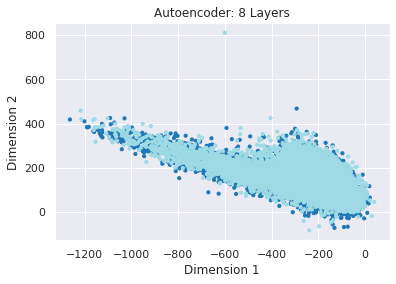

In [ ]:
# REDUCE DIMENSIONS WITH AUTOENCODER
model = Sequential()
model.add(Dense(100,       activation='elu', input_shape=(n_input,)))
model.add(Dense(50,       activation='elu'))
model.add(Dense(20,       activation='elu'))
model.add(Dense(n_input,        activation='linear', name="bottleneck"))
model.add(Dense(20,       activation='elu'))
model.add(Dense(50,       activation='elu'))
model.add(Dense(100,       activation='elu'))
model.add(Dense(n_input,  activation='sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = Adam())
model.fit(x_train_auto, x_train_auto, batch_size = 8, epochs = 100, verbose = 3)
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train_auto)
bottleneck_representation_test = encoder.predict(X_test_pca)

#Gráfica
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = y_train, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 8 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

In [ ]:
bottleneck_representation.shape, bottleneck_representation_test.shape

((22564, 500), (2513, 500))

### TSNE

Es la evaluación de PCA, en algunas partes.

In [ ]:
from sklearn.manifold import TSNE
import sklearn.manifold
from time import time
# Time the tSNE computation
t0 = time()

# Find the optimal low-dimensional representation with t-SNE
tsne_rna = sklearn.manifold.TSNE(n_components=3, init='pca', random_state=0,verbose=1)
embed_tsne = tsne_rna.fit_transform(X_train_pca)
embed_tsne_test = tsne_rna.fit_transform(X_test_pca)

# Store the time
t_tsne = time() - t0
# Print time
print('t-SNE took %.2fs.' % t_tsne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 22564 samples in 1.899s...
[t-SNE] Computed neighbors for 22564 samples in 650.826s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22564
[t-SNE] Computed conditional probabilities for sample 2000 / 22564
[t-SNE] Computed conditional probabilities for sample 3000 / 22564
[t-SNE] Computed conditional probabilities for sample 4000 / 22564
[t-SNE] Computed conditional probabilities for sample 5000 / 22564
[t-SNE] Computed conditional probabilities for sample 6000 / 22564
[t-SNE] Computed conditional probabilities for sample 7000 / 22564
[t-SNE] Computed conditional probabilities for sample 8000 / 22564
[t-SNE] Computed conditional probabilities for sample 9000 / 22564
[t-SNE] Computed conditional probabilities for sample 10000 / 22564
[t-SNE] Computed conditional probabilities for sample 11000 / 22564
[t-SNE] Computed conditional probabilities for sample 12000 / 22564
[t-SNE] Computed conditional probabilities for s

In [ ]:
embed_tsne.shape, embed_tsne_test.shape

NameError: ignored

In [ ]:
embed_tsne[0,:]

# **Metricas**

In [ ]:
def metrics(algoritmo,Y_validation,predictions):
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creamos la matriz de confusión
    cm = confusion_matrix(Y_validation, predictions)

    # Visualizamos la matriz de confusión
    df_cm = pd.DataFrame(cm, range(2), range(2))  
    plt.figure(figsize = (10,6))
    plt.title('Matrix de Confusión '+algoritmo)
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta predicta')  
    sn.set(font_scale=1.4) #for label size  
    sn.heatmap(df_cm, annot=True,fmt = 'd', annot_kws={"size": 12}) # font size
    plt.savefig(fname=BASE_DIR_GRA +"/Matrix_Confusion"+algoritmo+" "+fecha_hora()+".png")  
    plt.show()  

# **Algoritmos de Machine Learning**

Se ejecutaran los algoritmos con la data original, escalada y luego con reducción de dimensionalidad sin 

In [ ]:
#Variable para determinar el modelo analizar

#PCA escalado
XTRAIN = X_train_pca_scaled
XTEST = X_test_pca_scaled


## 1.KNN - K-Nearest Neighbors

In [ ]:
#KNN Grid Search

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca_scaled
#XTEST = X_test_pca_scaled

KNN = KNeighborsClassifier()

neighbors_setting = range(1,11)

print("Modelo con KNN:")
t0 = time()

#grid_values = {'n_neighbors':np.linspace(1,10,5).astype('int')}
grid_values = {'n_neighbors':neighbors_setting}
grid_KNN_acc = GridSearchCV(KNN, param_grid = grid_values, scoring = 'accuracy', verbose=2,n_jobs=-1)

#Validación
KNN_history_PCA = grid_KNN_acc.fit(XTRAIN, y_train)

#Validación caracteristicas importantes
#KNN_history_LGB = grid_KNN_acc.fit(X_train_small, y_train)
#KNN_history_test_LGB = grid_KNN_acc.fit(X_test_small, y_test)
print("done in %0.3fs" % (time() - t0))
#------------------------Imprimir resultados
#PCA
print("Resultados train:", KNN_history_PCA.best_params_,KNN_history_PCA.best_score_)
#LGB
#print("Resultados LGB:", KNN_history_LGB.best_params_,KNN_history_LGB.best_score_)



Modelo con KNN:
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 58.4min finished


done in 3505.365s
Resultados train: {'n_neighbors': 2} 0.5295598766683481


In [ ]:
grid_mean_scores = np.array(KNN_history_PCA.cv_results_['mean_test_score'])
print(grid_mean_scores)

#grid_mean_scores_lgb = np.array(KNN_history_LGB.cv_results_['mean_test_score'])
#grid_test_mean_scores_lgb = np.array(KNN_history_test_LGB.cv_results_['mean_test_score'])


[0.51001555 0.52955988 0.48253823 0.49166802 0.47119273 0.47611224
 0.46485523 0.46857817 0.46219629 0.46450092]


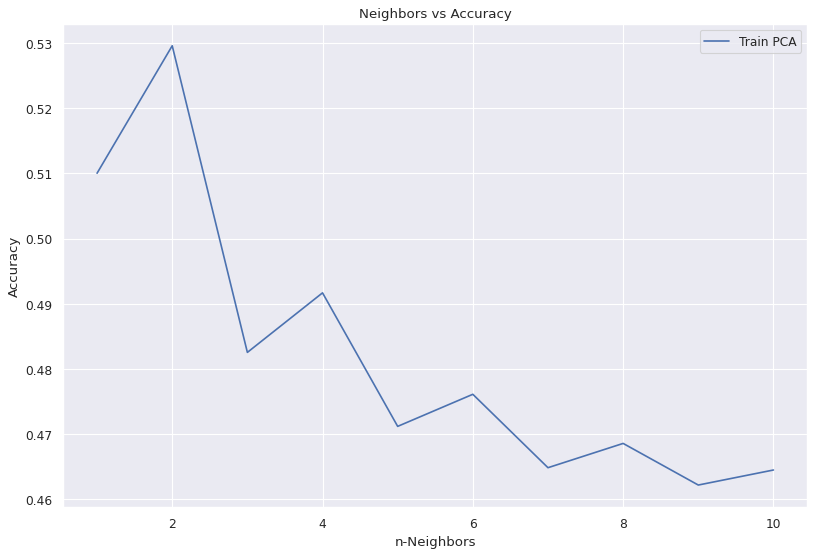

The best score with data validation with PCA: 52.9560% with Neighbors:  2


In [ ]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(neighbors_setting,grid_mean_scores,label='Train PCA')
#plt.plot(neighbors_setting,grid_test_mean_scores,label='Test PCA')
#plt.plot(neighbors_setting,grid_mean_scores_lgb,label='Train LGB')
#plt.plot(neighbors_setting,grid_test_mean_scores_lgb,label='Test LGB')


plt.xlabel('n-Neighbors')
plt.ylabel('Accuracy')
plt.title('Neighbors vs Accuracy')
plt.legend()
plt.savefig(fname=BASE_DIR_GRA +"/KNN-Algorithm "+fecha_hora()+".png", dpi=100) 
plt.show()  
print('The best score with data train with PCA: {:.4f}%'.format(100*KNN_history_PCA.best_score_),'with Neighbors: ',KNN_history_PCA.best_params_.get('n_neighbors'))
#print('The best score with data validation with LGB: {:.4f}%'.format(100*KNN_history_LGB.best_score_),'with Neighbors: ',KNN_history_LGB.best_params_.get('n_neighbors'))


In [ ]:
# Predecir valores basados en nuevos parámetros
predictions_KNN = KNN_history_PCA.predict(XTEST)

In [ ]:
#Se realizan las predicciones con los valores de test con PCA
print("Valores de predicción:",predictions_KNN)

Valores de predicción: [1 0 0 ... 1 0 1]


In [ ]:
#Revisar donde se equivoco en las predicciones 
predictions_KNN==y_test

array([False,  True,  True, ...,  True, False,  True])

{'n_neighbors': 2} Score:  0.5295598766683481
Accuracy: 0.5968961400716275
F1 score: 0.5765662621537002
Recall: 0.5968961400716275
Precision: 0.6705480253663937

 clasification report:
               precision    recall  f1-score   support

           0       0.78      0.38      0.51      1401
           1       0.53      0.87      0.66      1112

    accuracy                           0.60      2513
   macro avg       0.66      0.62      0.58      2513
weighted avg       0.67      0.60      0.58      2513


 confusion matrix:
 [[535 866]
 [147 965]]


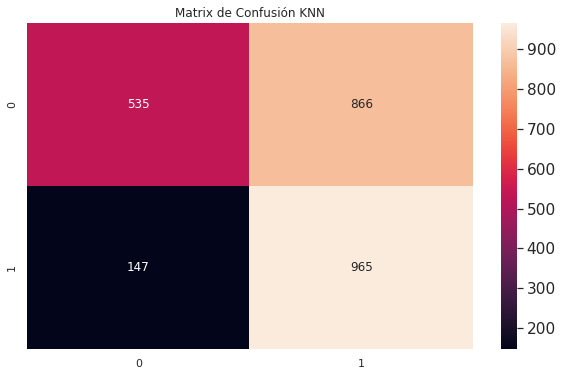

In [ ]:
#Imprimir métricas
print(grid_KNN_acc.best_params_,"Score: ", grid_KNN_acc.best_score_)
metrics("KNN",y_test,predictions_KNN)


In [ ]:
type(neighbors_setting)

range

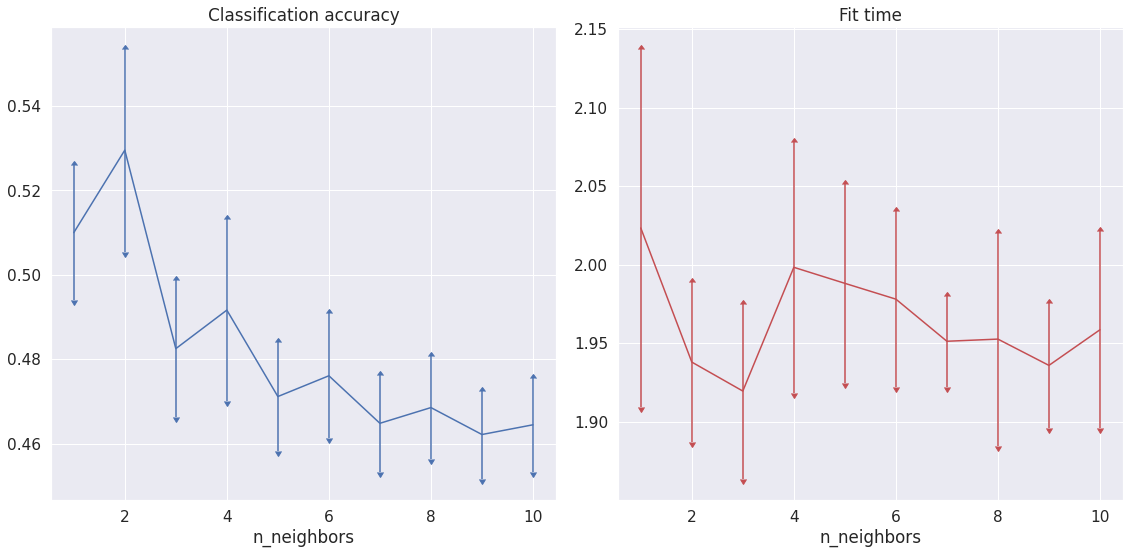

In [ ]:
# Plot the results of the grid search.
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].errorbar(x=neighbors_setting,
                 y=KNN_history_PCA.cv_results_['mean_test_score'],
                 yerr=KNN_history_PCA.cv_results_['std_test_score'],uplims=True, lolims=True)
axes[0].set(xlabel='n_neighbors', title='Classification accuracy')
axes[1].errorbar(x=neighbors_setting,
                 y=KNN_history_PCA.cv_results_['mean_fit_time'],
                 yerr=KNN_history_PCA.cv_results_['std_fit_time'],color='r',uplims=True, lolims=True)
axes[1].set(xlabel='n_neighbors', title='Fit time')
fig.tight_layout()
plt.savefig(fname=BASE_DIR_GRA +"/Clasificación_AccuracyKNN "+fecha_hora()+".png")  
plt.show()

In [ ]:
KNN_history_PCA.cv_results_

{'mean_fit_time': array([2.02345395, 1.93806996, 1.91962285, 1.99839897, 1.98820381,
        1.97814283, 1.95132771, 1.95270166, 1.93596768, 1.95864348]),
 'mean_score_time': array([136.03367219, 136.37281079, 136.96328225, 140.13767562,
        139.14873519, 138.95652943, 137.81370397, 137.71824465,
        136.7918396 , 134.38423662]),
 'mean_test_score': array([0.51001555, 0.52955988, 0.48253823, 0.49166802, 0.47119273,
        0.47611224, 0.46485523, 0.46857817, 0.46219629, 0.46450092]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors': 9},
  {'n_neighbors': 10}],
 'rank_test_score': array([ 2,  1, 

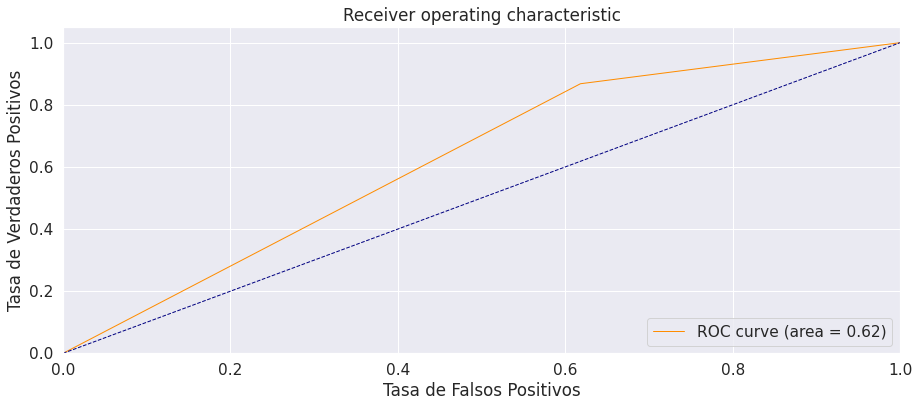

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_KNN)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_KNN "+fecha_hora()+".png")  
plt.show()

## 2.Logistic Regression

In [ ]:
#Grid Search
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

print("Modelo con LR:")
t0 = time()

# Se ingresan el algoritmo Logistic Regression de entrenamiento para que aprende
LR= LogisticRegression(solver='liblinear', multi_class='ovr')

grid_values = {'penalty': ['l1', 'l2','elasticnet'],'C':[0.001,0.01,0.1,1,10]}
grid_LR_acc = GridSearchCV(LR, param_grid = grid_values, scoring = 'accuracy', verbose=2, n_jobs=-1)
LR_history = grid_LR_acc.fit(XTRAIN, y_train)

#Predict values based on new parameters
predictions_LR = grid_LR_acc.predict(XTEST)

print("done in %0.3fs" % (time() - t0))
#------------------------Imprimir resultados
print("Resultados:", grid_LR_acc.best_params_,grid_LR_acc.best_score_)



Modelo con LR:
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   33.3s finished


done in 34.295s
Resultados: {'C': 0.01, 'penalty': 'l1'} 0.7886011628345535


In [ ]:
#Se realizan las predicciones con los valores de test con PCA
print("Valores de predicción:",predictions_LR)

Valores de predicción: [0 0 0 ... 1 0 1]


In [ ]:
#Revisar donde se equivoco en las predicciones 
predictions_LR==y_test

array([ True,  True,  True, ...,  True, False,  True])

{'C': 0.01, 'penalty': 'l1'} Score:  0.7886011628345535
Accuracy: 0.8698766414643851
F1 score: 0.868438732536841
Recall: 0.8698766414643851
Precision: 0.8737561719893013

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1401
           1       0.91      0.78      0.84      1112

    accuracy                           0.87      2513
   macro avg       0.88      0.86      0.87      2513
weighted avg       0.87      0.87      0.87      2513


 confusion matrix:
 [[1314   87]
 [ 240  872]]


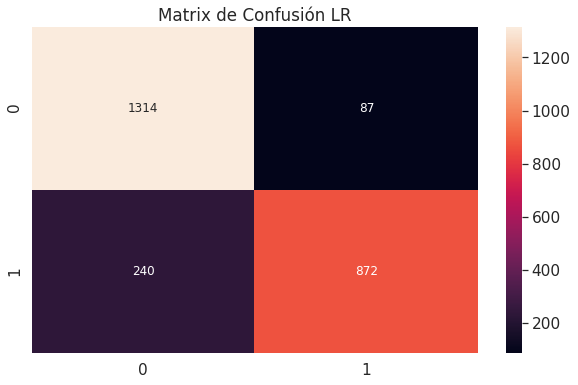

In [ ]:
#Imprimir métricas
print(LR_history.best_params_,"Score: ", LR_history.best_score_)
metrics("LR",y_test,predictions_LR)

In [ ]:
grid_mean_scores = np.array(LR_history.cv_results_['mean_test_score'])
print(grid_mean_scores)

[0.74716482 0.77659057        nan 0.78860116 0.78199758        nan
 0.78474523 0.78252938        nan 0.78257371 0.78270667        nan
 0.78266234 0.78266235        nan]


In [ ]:
LR_setting= range(1,5)
LR_setting

range(1, 5)

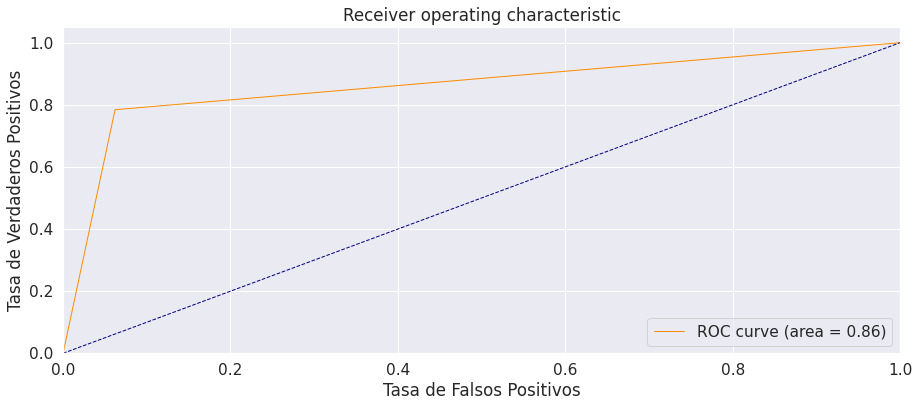

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_LR)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_LR "+fecha_hora()+".png")  
plt.show()

##3.Decision Tree

In [ ]:
#Grid Search
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

DT = DecisionTreeClassifier()

t0 = time()
grid_values = {"criterion":['gini','entropy'],"max_depth":range(1,5),"min_samples_split":range(1,5),"min_samples_leaf":range(1,5)}
grid_DT_acc = GridSearchCV(DT, param_grid = grid_values, verbose=1,n_jobs=-1)
DT_history = grid_DT_acc.fit(XTRAIN, y_train)
print("done in %0.3fs" % (time() - t0))

#------------------------Imprimir resultados
print("Resultados:", DT_history.best_params_,DT_history.best_score_)



Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 25.5min finished


done in 1538.310s
Resultados: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3} 0.7380344685879877


In [ ]:
#Predict values based on new parameters
predictions_DT = grid_DT_acc.predict(XTEST)

print(grid_DT_acc.best_params_,grid_DT_acc.best_score_)


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3} 0.7380344685879877


In [ ]:
#Se realizan las predicciones con los valores de test con PCA
print("Valores de predicción:",predictions_DT)

Valores de predicción: [0 0 0 ... 1 0 1]


In [ ]:
#Revisar donde se equivoco en las predicciones 
predictions_DT==y_test

array([ True,  True,  True, ...,  True, False,  True])

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3} Score:  0.7380344685879877
Accuracy: 0.7902904894548348
F1 score: 0.7892732151938666
Recall: 0.7902904894548348
Precision: 0.7899305614831823

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82      1401
           1       0.78      0.73      0.75      1112

    accuracy                           0.79      2513
   macro avg       0.79      0.78      0.79      2513
weighted avg       0.79      0.79      0.79      2513


 confusion matrix:
 [[1178  223]
 [ 304  808]]


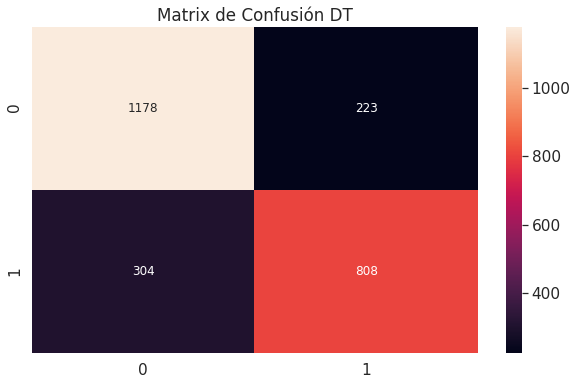

In [ ]:
#Imprimir métricas
print(grid_DT_acc.best_params_,"Score: ", grid_DT_acc.best_score_)
metrics("DT",y_test,predictions_DT)

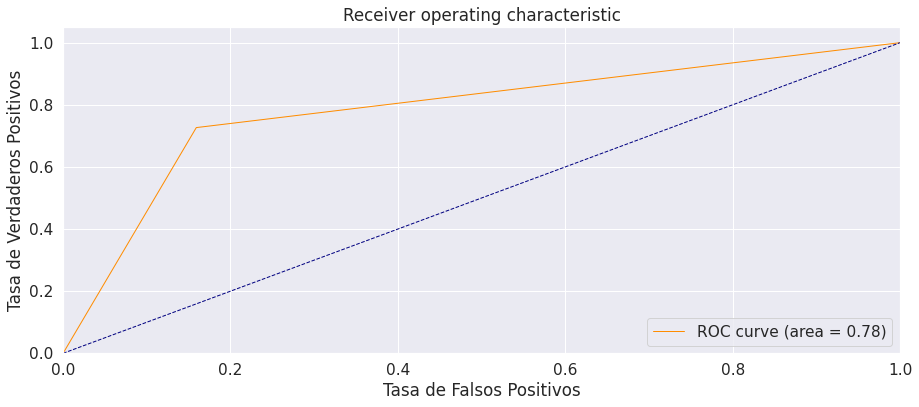

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_DT)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_DT "+fecha_hora()+".png")  
plt.show()

##4.Random Forest

In [ ]:
#Grid Search 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

# Create a based model
RF = RandomForestClassifier(random_state = 1, min_samples_split = 5,  min_samples_leaf = 1, n_jobs=-1) 

t0 = time()
grid_values = [ {'n_estimators': [10,50,100,200], 'max_features': ['auto', 'sqrt', 'log2'],  'max_depth': [5, 10]}]
grid_RF_acc = GridSearchCV(RF, param_grid = grid_values, verbose=1, scoring="accuracy", n_jobs= -1)
RF_history = grid_RF_acc.fit(XTRAIN, y_train)
#RF_history_test = grid_RF_acc.fit(XTEST, y_test)
print("done in %0.3fs" % (time() - t0))

predictions_RF = grid_RF_acc.predict(XTEST)

#------------------------Imprimir resultados
print("Resultados:", grid_RF_acc.best_params_,grid_RF_acc.best_score_)
#print("Resultados test:", RF_history_test.best_params_,RF_history_test.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 25.2min finished


done in 1570.879s
Resultados: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200} 0.7361714405036357


In [ ]:
grid_values

[{'max_depth': [5, 10],
  'max_features': ['auto', 'sqrt', 'log2'],
  'n_estimators': [10, 50, 100, 200]}]

In [ ]:
#Se realizan las predicciones con los valores de test con PCA
print("Valores de predicción:",predictions_RF)

Valores de predicción: [0 0 0 ... 0 0 1]


In [ ]:
#Revisar donde se equivoco en las predicciones 
predictions_RF==y_test

array([ True,  True,  True, ..., False, False,  True])

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200} Score:  0.7361714405036357
Accuracy: 0.7883008356545961
F1 score: 0.7754330667635129
Recall: 0.7883008356545961
Precision: 0.8279162422197015

 clasification report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.84      1401
           1       0.95      0.55      0.70      1112

    accuracy                           0.79      2513
   macro avg       0.84      0.76      0.77      2513
weighted avg       0.83      0.79      0.78      2513


 confusion matrix:
 [[1367   34]
 [ 498  614]]


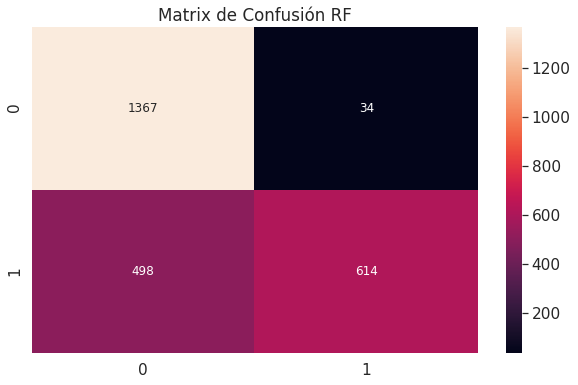

In [ ]:
#Imprimir métricas
print(RF_history.best_params_,"Score: ", RF_history.best_score_)
metrics("RF",y_test,predictions_RF)

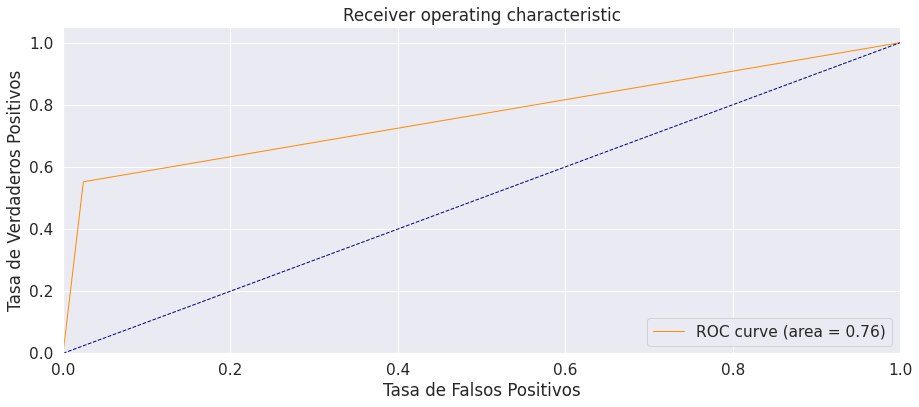

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_RF)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_RF "+fecha_hora()+".png")  
plt.show()

##5.SVM - Support Vector Machine

In [ ]:
#Librerias
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time
from sklearn import svm
from time import time


In [ ]:
# #############################################################################
# Train a SVM classification model - Gridseach

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

print("Fitting the classifier to the training set")
t0 = time()
#param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],'kernel': [ 'rbf'] } #  [ 'rbf' , 'poly' , 'sigmoid' , 'linear' ]
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],'kernel': [ 'rbf'],'class_weight':['balanced']}
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale'],'kernel': [ 'rbf'], 'class_weight':['balanced']} 
grid_SVM_acc = GridSearchCV(SVC(), param_grid, cv=2, refit=True,scoring="accuracy", verbose=1, n_jobs=-1)
SVM_history = grid_SVM_acc.fit(XTRAIN, y_train)
#SVM_history_test = grid_SVM_acc.fit(XTRAIN, y_train)
print("done in %0.3fs" % (time() - t0))


predictions_SVM = SVM_history.predict(XTEST)

#------------------------Imprimir resultados
print("Resultados:", grid_SVM_acc.best_params_,grid_SVM_acc.best_score_)


Fitting the classifier to the training set
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 20.8min finished


done in 2109.794s
Resultados: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'} 0.7549636589257224


Mejor estimador encontrado por grid search:
SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Mejor Score encontrado por grid search:
Score:  0.7549636589257224
Mejor parametros encontrado por grid search:
Parametros:  {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
-------------- METRICAS ------------------
Accuracy: 0.8678869876641464
F1 score: 0.8661982664556575
Recall: 0.8678869876641464
Precision: 0.8728783165643315

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1401
           1       0.91      0.77      0.84      1112

    accuracy                           0.87      2513
   macro avg       0.88      0.86      0.86      2513
weighted avg       0.87      0.87      0.87      2

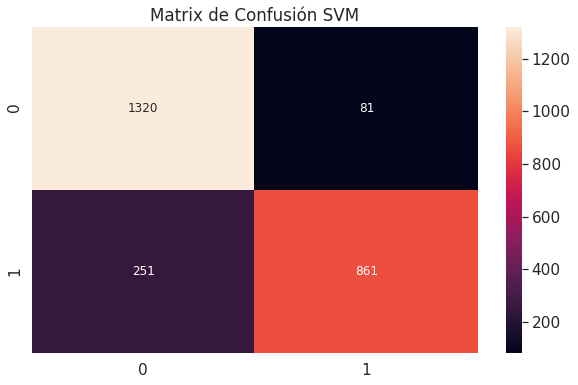

In [ ]:
#Imprimir métricas
print("Mejor estimador encontrado por grid search:")
print(SVM_history.best_estimator_)
print("Mejor Score encontrado por grid search:")
print("Score: ", SVM_history.best_score_)
print("Mejor parametros encontrado por grid search:")
print("Parametros: ", SVM_history.best_params_)

print("-------------- METRICAS ------------------")
metrics("SVM",y_test,predictions_SVM)

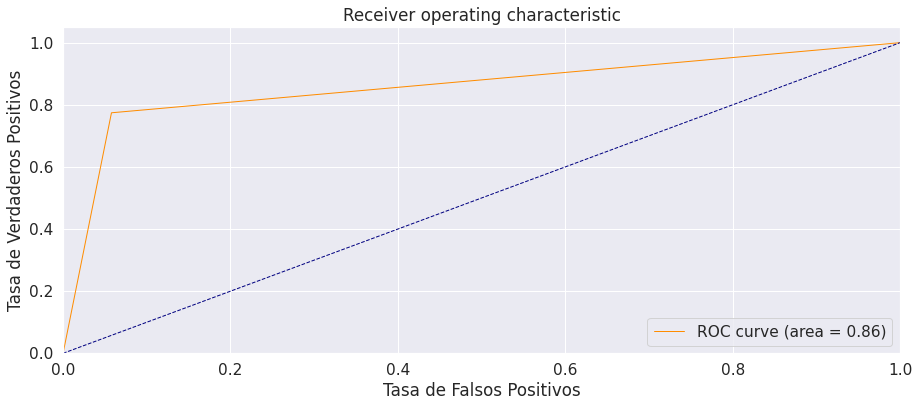

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_SVM)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_SVM "+fecha_hora()+".png")  
plt.show()

In [ ]:
# Calcular la matriz de confusión y utilizarla para derivar la precisión, sensibilidad y especificidad
cm = confusion_matrix(y_test, predictions_SVM)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Mostrar la matriz de confusión, precisión, sensibilidad y especificidad
print(cm)
print("accuracy: {:.3f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[1320   81]
 [ 251  861]]
accuracy: 0.868
sensitivity: 0.9422
specificity: 0.7743


## 6.LDA

In [ ]:
#Grid Search 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

# Linear Discriminant Analysis - Ajuste de Parámetros
LDA = LinearDiscriminantAnalysis()

print("Modelo con LDA:")
t0 = time()

grid_values = {"solver" : ['svd', 'lsqr', 'eigen'],
              "tol" : [0.0001,0.0002,0.0003]}
grid_LDA_acc = GridSearchCV(LDA, param_grid = grid_values, scoring = 'accuracy', verbose=1, n_jobs=-1)
LDA_history = grid_LDA_acc.fit(XTRAIN, y_train)

print("done in %0.3fs" % (time() - t0))

#Predict values based on new parameters
predictions_LDA = grid_LDA_acc.predict(XTEST)

#------------------------Imprimir resultados
print("Resultados:", LDA_history.best_params_,LDA_history.best_score_)

Modelo con LDA:
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.2min finished


done in 77.857s
Resultados: {'solver': 'svd', 'tol': 0.0001} 0.7730893651594369


{'solver': 'svd', 'tol': 0.0001} Score:  0.7730893651594369
Accuracy: 0.8627138877835256
F1 score: 0.8611421659875793
Recall: 0.8627138877835256
Precision: 0.8666294952781503

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1401
           1       0.90      0.77      0.83      1112

    accuracy                           0.86      2513
   macro avg       0.87      0.85      0.86      2513
weighted avg       0.87      0.86      0.86      2513


 confusion matrix:
 [[1307   94]
 [ 251  861]]


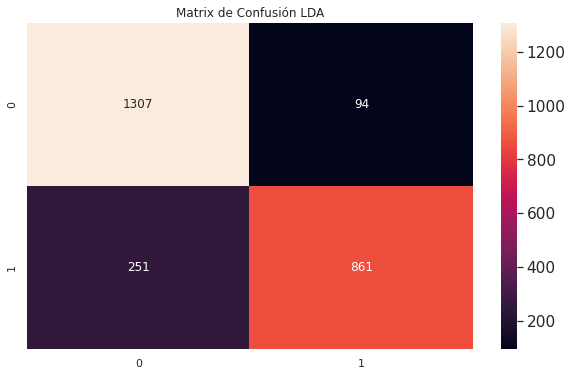

In [ ]:
#Imprimir métricas
print(LDA_history.best_params_,"Score: ", LDA_history.best_score_)
metrics("LDA",y_test,predictions_LDA)

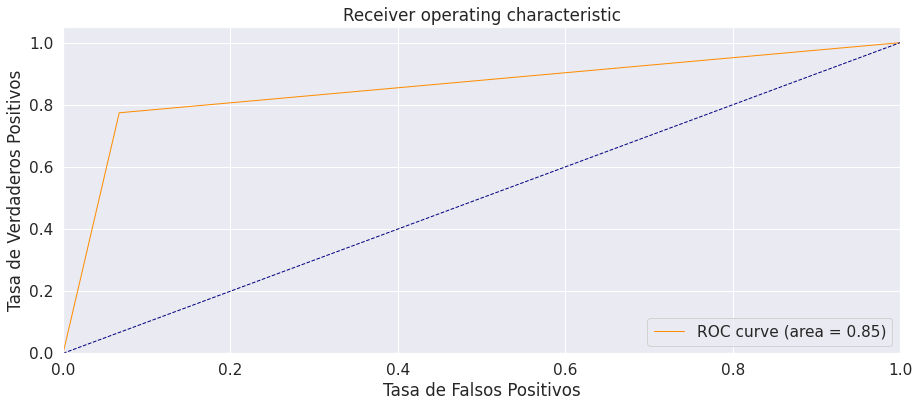

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_LDA)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_LDA "+fecha_hora()+".png")  
plt.show()

## Validación Cruzada

In [ ]:
#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

seed = 42
scoring = 'accuracy'
t0 = time()

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    t1 = time()
    #segmentar la base de datos de entrenamiento en 5 partes
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    #probar los grupos en cada modelp
    cv_results = model_selection.cross_val_score(model, XTRAIN, y_train, cv=kfold, scoring=scoring)
    #almacena resultados
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("done Algoritmo in %0.3fs" % (time() - t1))

print("done in %0.3fs" % (time() - t0))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.686044 (0.083126)
done Algoritmo in 1.080s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.670799 (0.088975)
done Algoritmo in 12.732s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.448835 (0.427791)
done Algoritmo in 548.451s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.634276 (0.155964)
done Algoritmo in 2692.874s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.542221 (0.250882)
done Algoritmo in 259.994s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DT: 0.608666 (0.059140)
done Algoritmo in 121.986s
done in 3637.118s


También podemos crear un gráfico de los resultados de la evaluación del modelo y comparar la dispersión y la precisión media de cada modelo. Hay una población de medidas de precisión para cada algoritmo porque cada algoritmo se evaluó 5veces (validación cruzada 5 veces).


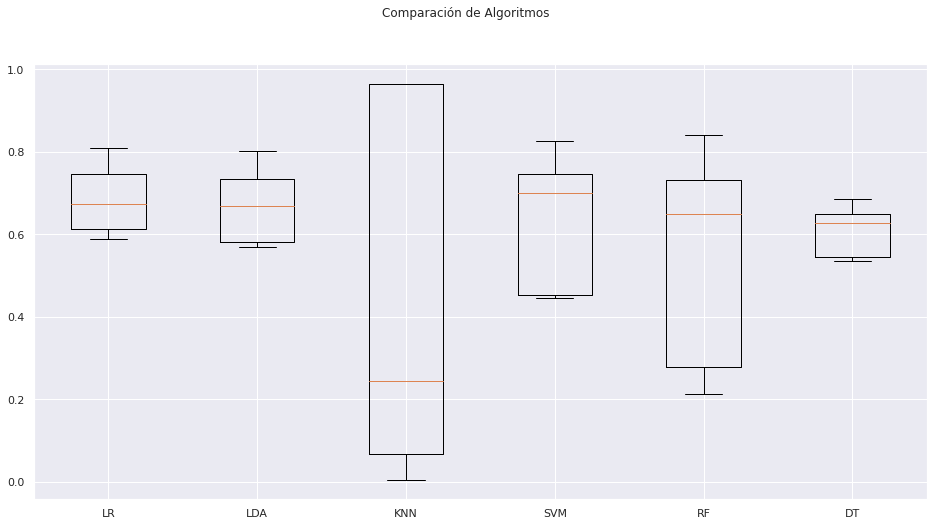

In [ ]:
# Compare Algorithms Accuracy
fig = plt.figure(figsize=(16,8))
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig(fname=BASE_DIR_GRA +"/Validación Cruzada"+fecha_hora()+".png") 
plt.show()

# **Deep Learning**

## Multilayer Perceptron o Fully connected

In [ ]:
#Se trabaja con los datos linealizados.

# normalize inputs from 0-255 to 0-1
X_train_normalize = X_train_pca_scaled / 255
X_test_normalize = X_test_pca_scaled / 255

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_YTrain = encoder.transform(y_train)
encoded_YValidation = encoder.transform(y_test)
encode_XTrain=X_train_normalize
encode_Xvalidation=X_test_normalize

# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)
num_classes = categorical_YValidation.shape[1]

### Tunear el modelo

Tunear el modelo para ir agregando capas densas

In [ ]:
#Función para crear capas densas
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], input_dim=encode_XTrain.shape[1], activation='relu'))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'relu'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

In [ ]:
#Evaluación del modelo e impresión de resultados.
def evaluate(model, batch_size=32, epochs=10):
    model.summary()
    model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(encode_XTrain, categorical_YTrain, validation_data=(encode_Xvalidation,categorical_YValidation), epochs=epochs, batch_size=batch_size, verbose=2)
    scores = model.evaluate(encode_Xvalidation, categorical_YValidation,verbose=0)    
   
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("\nBaseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
for layers in range(1, 5):
    model = create_dense([64] * layers)
    evaluate(model)

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 64)                32064     
_________________________________________________________________
dense_160 (Dense)            (None, 2)                 130       
Total params: 32,194
Trainable params: 32,194
Non-trainable params: 0
_________________________________________________________________
Train on 22564 samples, validate on 2513 samples
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


22564/22564 - 2s - loss: 0.6862 - accuracy: 0.5560 - val_loss: 0.6829 - val_accuracy: 0.5575
Epoch 2/10
22564/22564 - 1s - loss: 0.6800 - accuracy: 0.5569 - val_loss: 0.6732 - val_accuracy: 0.5575
Epoch 3/10
22564/22564 - 1s - loss: 0.6663 - accuracy: 0.5588 - val_loss: 0.6508 - val_accuracy: 0.5635
Epoch 4/10
22564/22564 - 2s - loss: 0.6408 - accuracy: 0.6384 - val_loss: 0.6152 - val_accuracy: 0.6554
Epoch 5/10
22564/22564 - 1s - loss: 0.6040 - accuracy: 0.7417 - val_loss: 0.5682 - val_accuracy: 0.7963
Epoch 6/10
22564/22564 - 2s - loss: 0.5626 - accuracy: 0.7810 - val_loss: 0.5196 - val_accuracy: 0.8492
Epoch 7/10
22564/22564 - 2s - loss: 0.5265 - accuracy: 0.7927 - val_loss: 0.4818 - val_accuracy: 0.8500
Epoch 8/10
22564/22564 - 2s - loss: 0.4984 - accuracy: 0.7945 - val_loss: 0.4514 - val_accuracy: 0.8563
Epoch 9/10
22564/22564 - 2s - loss: 0.4789 - accuracy: 0.7968 - val_loss: 0.4369 - val_accuracy: 0.8476
Epoch 10/10
22564/22564 - 1s - loss: 0.4655 - accuracy: 0.7977 - val_loss: 

In [ ]:
# Establecer diferentes cantidades de neuronas con una(1) sola capa
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 32)                16032     
_________________________________________________________________
dense_97 (Dense)             (None, 2)                 66        
Total params: 16,098
Trainable params: 16,098
Non-trainable params: 0
_________________________________________________________________
Train on 22564 samples, validate on 2513 samples
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


22564/22564 - 2s - loss: 0.6861 - accuracy: 0.5565 - val_loss: 0.6824 - val_accuracy: 0.5575
Epoch 2/10
22564/22564 - 1s - loss: 0.6800 - accuracy: 0.5569 - val_loss: 0.6740 - val_accuracy: 0.5575
Epoch 3/10
22564/22564 - 1s - loss: 0.6700 - accuracy: 0.5569 - val_loss: 0.6594 - val_accuracy: 0.5575
Epoch 4/10
22564/22564 - 1s - loss: 0.6525 - accuracy: 0.5763 - val_loss: 0.6339 - val_accuracy: 0.5909
Epoch 5/10
22564/22564 - 1s - loss: 0.6261 - accuracy: 0.6871 - val_loss: 0.6005 - val_accuracy: 0.7517
Epoch 6/10
22564/22564 - 1s - loss: 0.5953 - accuracy: 0.7574 - val_loss: 0.5632 - val_accuracy: 0.8150
Epoch 7/10
22564/22564 - 1s - loss: 0.5626 - accuracy: 0.7805 - val_loss: 0.5264 - val_accuracy: 0.8460
Epoch 8/10
22564/22564 - 1s - loss: 0.5361 - accuracy: 0.7901 - val_loss: 0.4981 - val_accuracy: 0.8532
Epoch 9/10
22564/22564 - 1s - loss: 0.5117 - accuracy: 0.7927 - val_loss: 0.4709 - val_accuracy: 0.8544
Epoch 10/10
22564/22564 - 1s - loss: 0.4934 - accuracy: 0.7963 - val_loss: 

In [ ]:
# Establecer diferentes cantidades de neuronas en multiples capas
for nodes_per_layer in [32, 64, 128]:
    for layers in [2, 4, 6]:
        model = create_dense([nodes_per_layer] * layers)
        evaluate(model, epochs=5*layers)

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 32)                16032     
_________________________________________________________________
dense_187 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_188 (Dense)            (None, 2)                 66        
Total params: 17,154
Trainable params: 17,154
Non-trainable params: 0
_________________________________________________________________
Train on 22564 samples, validate on 2513 samples
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


22564/22564 - 4s - loss: 0.6853 - accuracy: 0.5566 - val_loss: 0.6803 - val_accuracy: 0.5575
Epoch 2/10
22564/22564 - 2s - loss: 0.6668 - accuracy: 0.5595 - val_loss: 0.6294 - val_accuracy: 0.5742
Epoch 3/10
22564/22564 - 2s - loss: 0.5817 - accuracy: 0.7211 - val_loss: 0.4965 - val_accuracy: 0.8317
Epoch 4/10
22564/22564 - 3s - loss: 0.4884 - accuracy: 0.7908 - val_loss: 0.4169 - val_accuracy: 0.8623
Epoch 5/10
22564/22564 - 3s - loss: 0.4563 - accuracy: 0.7974 - val_loss: 0.4182 - val_accuracy: 0.8484
Epoch 6/10
22564/22564 - 3s - loss: 0.4493 - accuracy: 0.7982 - val_loss: 0.3971 - val_accuracy: 0.8595
Epoch 7/10
22564/22564 - 3s - loss: 0.4458 - accuracy: 0.8023 - val_loss: 0.4024 - val_accuracy: 0.8579
Epoch 8/10
22564/22564 - 3s - loss: 0.4453 - accuracy: 0.8026 - val_loss: 0.3965 - val_accuracy: 0.8607
Epoch 9/10
22564/22564 - 3s - loss: 0.4444 - accuracy: 0.8044 - val_loss: 0.3889 - val_accuracy: 0.8659
Epoch 10/10
22564/22564 - 3s - loss: 0.4444 - accuracy: 0.8038 - val_loss: 

### Tunear el modelo con Gridsearch

Se realiza un tuneo con GridSearch para ver si se encuentran mejores paramétros para el modelo.

In [ ]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=encode_XTrain.shape[1], kernel_initializer='normal',activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
    return model


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# summarize layers
print(create_model().summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 40,514
Trainable params: 40,514
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# How to Tune Batch Size and Number of Epochs
t0 = time()

model = KerasClassifier(build_fn=create_model, verbose=1)
# define the grid search parameters
batch_size = [16,32] 
epochs =  [10,20,30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)

print("done FNN in %0.3fs" % (time() - t0))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  7.6min finished


Epoch 1/20
706/706 [==============================] - 3s 2ms/step - loss: 0.6865 - accuracy: 0.5550
Epoch 2/20
706/706 [==============================] - 2s 2ms/step - loss: 0.5558 - accuracy: 0.7277
Epoch 3/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4560 - accuracy: 0.7951
Epoch 4/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4428 - accuracy: 0.7993
Epoch 5/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4385 - accuracy: 0.8062
Epoch 6/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4340 - accuracy: 0.8101
Epoch 7/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4308 - accuracy: 0.8122
Epoch 8/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4137 - accuracy: 0.8222
Epoch 9/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4105 - accuracy: 0.8232
Epoch 10/20
706/706 [==============================] - 2s 2ms/step - loss: 0.3909 - accuracy: 0.8382

In [ ]:
#Se asignan las variables de los mejores resultados del grid search
batch_size=grid_result.best_params_['batch_size']
epochs=grid_result.best_params_['epochs']
print(batch_size)
print(epochs)

32
20


In [ ]:
# How to Tune the Training Optimization Algorithm

# Function to create model, required for KerasClassifier
def create_model(optimizer='sgd'):
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=1)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Epoch 1/20
565/565 [==============================] - 2s 2ms/step - loss: 0.6906 - accuracy: 0.5551
Epoch 2/20
565/565 [==============================] - 1s 2ms/step - loss: 0.6867 - accuracy: 0.5571
Epoch 3/20
565/565 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.5530
Epoch 4/20
565/565 [==============================] - 1s 2ms/step - loss: 0.6871 - accuracy: 0.5540
Epoch 5/20
565/565 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.5549
Epoch 6/20
565/565 [==============================] - 1s 2ms/step - loss: 0.6859 - accuracy: 0.5591
Epoch 7/20
565/565 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.5543
Epoch 8/20
565/565 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.5571
Epoch 9/20
565/565 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.5527
Epoch 10/20
565/565 [==============================] - 1s 2ms/step - loss: 0.6867 - accuracy: 0.5553

### Ejecución modelo

In [ ]:
#Se asignan las variables de los mejores resultados
batch_size=32
epochs=20

Epoch 1/20
706/706 [==============================] - 5s 3ms/step - loss: 0.6869 - accuracy: 0.5597 - val_loss: 0.6719 - val_accuracy: 0.5575
Epoch 2/20
706/706 [==============================] - 2s 2ms/step - loss: 0.6224 - accuracy: 0.6230 - val_loss: 0.4358 - val_accuracy: 0.8452
Epoch 3/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4551 - accuracy: 0.7938 - val_loss: 0.3946 - val_accuracy: 0.8635
Epoch 4/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4475 - accuracy: 0.8024 - val_loss: 0.3863 - val_accuracy: 0.8643
Epoch 5/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4373 - accuracy: 0.8087 - val_loss: 0.3876 - val_accuracy: 0.8647
Epoch 6/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4364 - accuracy: 0.8062 - val_loss: 0.3951 - val_accuracy: 0.8540
Epoch 7/20
706/706 [==============================] - 2s 2ms/step - loss: 0.4318 - accuracy: 0.8096 - val_loss: 0.3712 - val_accuracy: 0.8651
Epoch 

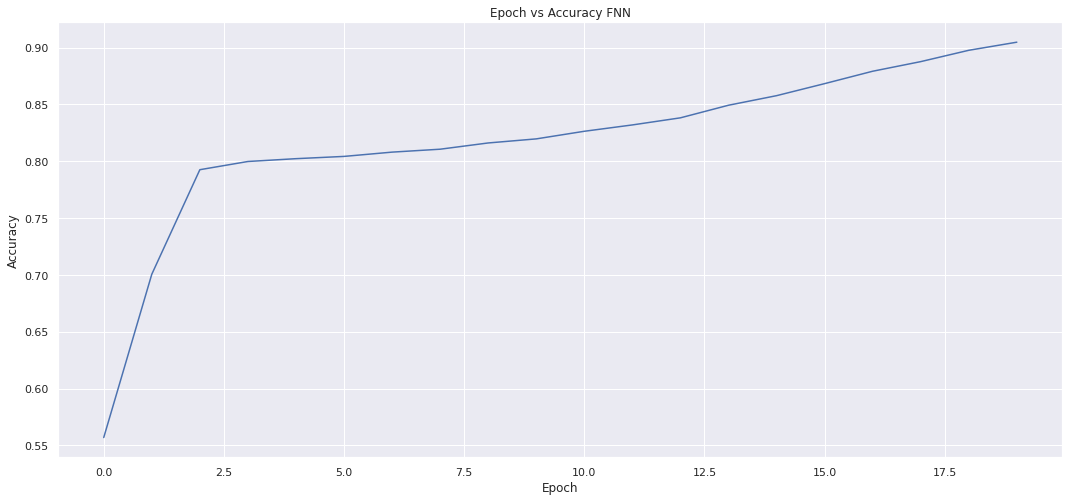

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=encode_XTrain.shape[1], kernel_initializer='normal',activation='relu'))
model.add(Dense(64,  kernel_initializer='normal',activation='relu'))
model.add(Dense(64,  kernel_initializer='normal',activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
optimizer = 'Adamax'
# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history=model.fit(encode_XTrain, categorical_YTrain, validation_data=(encode_Xvalidation,categorical_YValidation), epochs=epochs, batch_size=batch_size)

# plot metrics
plt.figure(figsize=(18, 8))
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy FNN')
plt.savefig(fname=BASE_DIR_GRA +"/Epoch vs Accuracy FNN "+fecha_hora()+".png") 
plt.show()


In [ ]:
scores = model.evaluate(encode_Xvalidation, categorical_YValidation)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

79/79 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8528

accuracy: 85.28%
Baseline Error: 14.72%


In [ ]:
snn_pred = model.predict(encode_Xvalidation, batch_size=batch_size, verbose=1)  
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(categorical_YValidation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

79/79 [==============================] - 0s 1ms/step
(2513,)
(2513,)
0.8527656187823319


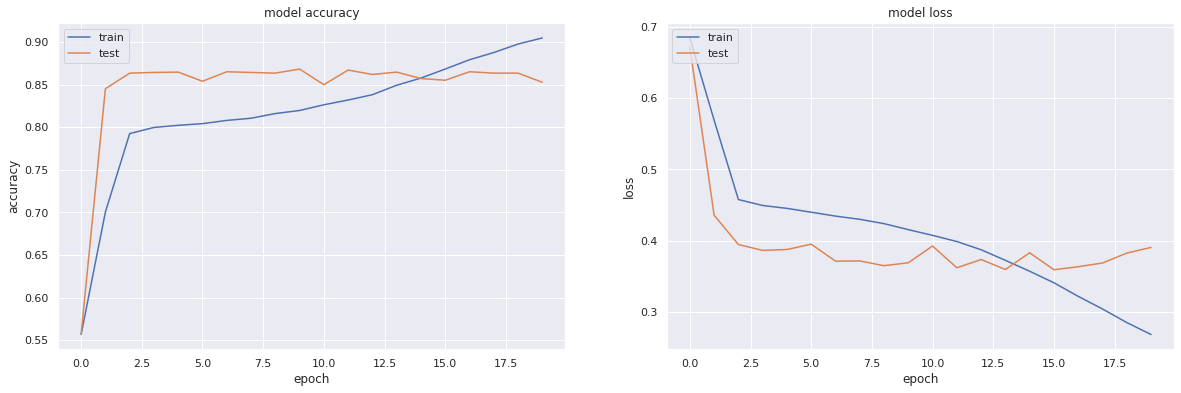

In [ ]:
# Función para imprimir el modelo y la perdida del modelo
def plot_learning_curve(history):
    plt.figure (figsize=(20,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    #plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(fname=BASE_DIR_GRA +"/'model accuracy FNN"+fecha_hora()+".png")

plot_learning_curve(history)

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1401
           1       0.89      0.76      0.82      1112

    accuracy                           0.85      2513
   macro avg       0.86      0.84      0.85      2513
weighted avg       0.86      0.85      0.85      2513



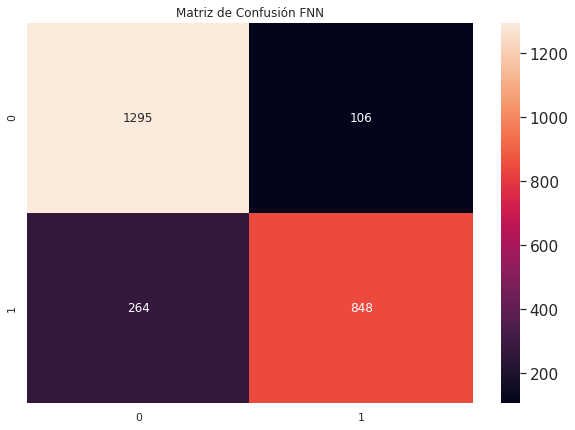

In [ ]:
snn_report = classification_report(np.argmax(categorical_YValidation, axis=1), snn_predicted)  
print(snn_report)

#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(categorical_YValidation, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(2), range(2))  
plt.figure(figsize = (10,7)) 
plt.title('Matriz de Confusión FNN')
sn.set(font_scale=1.4) #for label size  
sn.heatmap(snn_df_cm, annot=True, fmt = 'd',annot_kws={"size": 12}) # font size
plt.savefig(fname=BASE_DIR_GRA +"/Matriz de Confusión FNN "+fecha_hora()+".png") 
plt.show() 

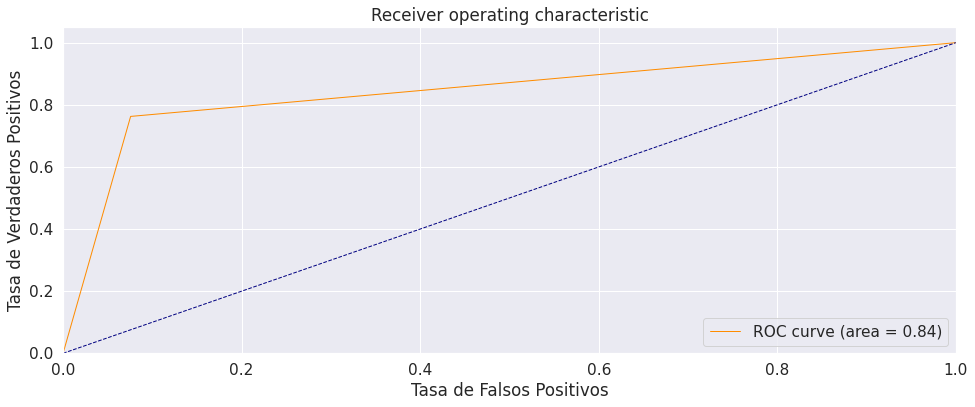

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, snn_predicted)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(16,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_CNN "+fecha_hora()+".png")
plt.show()

##CNN - Convolutional Neural Networks

In [ ]:
#Baseline Model with CNN

# normalize inputs from 0-255 to 0-1
X_train_normalize = X_train / 255
X_test_normalize = X_test / 255

In [ ]:
input_shape = (64, 64,3)
X_train_normalize.shape, y_train.shape

((22564, 64, 64, 3), (22564,))

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_YTrain = encoder.transform(y_train)
encoded_YValidation = encoder.transform(y_test)
encode_XTrain=X_train_normalize
encode_Xvalidation=X_test_normalize


# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)
num_classes = categorical_YValidation.shape[1]

In [ ]:
encode_XTrain.shape, categorical_YTrain.shape

((22564, 64, 64, 3), (22564, 2))

In [ ]:
X_train.shape, y_train.shape

((22564, 64, 64, 3), (22564,))

In [ ]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()

    
    model.add(Conv2D(64, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2)) # Se desconecta el 20%
    model.add(Flatten()) ## Esto convierte nuestros mapas de características 3D en vectores de características 1D
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# How to Tune Batch Size and Number of Epochs

model = KerasClassifier(build_fn=create_model, verbose=1)

# # Resumen de capas
print(create_model().summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)         

In [ ]:
t0 = time()

# Definir los parámetros de grid search
batch_size = [16,32]
epochs = [10,20,30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=3, verbose=1)
grid_result = grid.fit(X_train, categorical_YTrain)

print("done CNN in %0.3fs" % (time() - t0))


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


941/941 [==============================] - 35s 5ms/step - loss: 0.7776 - accuracy: 0.7839
Epoch 2/10
941/941 [==============================] - 5s 5ms/step - loss: 0.3963 - accuracy: 0.8412
Epoch 3/10
941/941 [==============================] - 5s 5ms/step - loss: 0.3606 - accuracy: 0.8531
Epoch 4/10
941/941 [==============================] - 5s 5ms/step - loss: 0.3339 - accuracy: 0.8661
Epoch 5/10
941/941 [==============================] - 5s 5ms/step - loss: 0.3177 - accuracy: 0.8725
Epoch 6/10
941/941 [==============================] - 5s 5ms/step - loss: 0.3139 - accuracy: 0.8741
Epoch 7/10
941/941 [==============================] - 5s 5ms/step - loss: 0.2911 - accuracy: 0.8862
Epoch 8/10
941/941 [==============================] - 5s 5ms/step - loss: 0.2754 - accuracy: 0.8928
Epoch 9/10
941/941 [==============================] - 5s 5ms/step - loss: 0.2624 - accuracy: 0.8950
Epoch 10/10
471/471 [==============================] - 1s 2ms/step - loss: 0.7183 - accuracy: 0.7227
Epoch 1/1

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 27.3min finished


1411/1411 [==============================] - 8s 5ms/step - loss: 0.6726 - accuracy: 0.7625
Epoch 2/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.4129 - accuracy: 0.8261
Epoch 3/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.3845 - accuracy: 0.8380
Epoch 4/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.3736 - accuracy: 0.8443
Epoch 5/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.3481 - accuracy: 0.8559
Epoch 6/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.3333 - accuracy: 0.8672
Epoch 7/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.3363 - accuracy: 0.8655
Epoch 8/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.3195 - accuracy: 0.8716
Epoch 9/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.3132 - accuracy: 0.8744
Epoch 10/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.2977 - accurac

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([ 59.36129228, 100.26113566, 151.51343417,  38.2395726 ,
         76.17053692, 113.99213552]),
 'mean_score_time': array([1.31737026, 1.30939817, 1.3446482 , 0.90655923, 0.92518139,
        0.93941943]),
 'mean_test_score': array([0.72332036, 0.70541577, 0.63929285, 0.67984233, 0.6595016 ,
        0.69517881]),
 'param_batch_size': masked_array(data=[16, 16, 16, 32, 32, 32],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_epochs': masked_array(data=[10, 20, 30, 10, 20, 30],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'batch_size': 16, 'epochs': 10},
  {'batch_size': 16, 'epochs': 20},
  {'batch_size': 16, 'epochs': 30},
  {'batch_size': 32, 'epochs': 10},
  {'batch_size': 32, 'epochs': 20},
  {'batch_size': 32, 'epochs': 30}],
 'rank_test_score': array([1, 2, 6, 4, 5, 3], dtype=int32),
 'split0_test_score'

###Tuning Model CNN

In [ ]:
#Se asignan las variables de los mejores resultados del grid search
batch_size=16
epochs=10

In [ ]:
# create model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2)) # Se desconecta el 20%
model.add(Flatten()) 

model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
optimizer = 'adam'
# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# summarize layers
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 6, 6, 64)        

In [ ]:
encode_Xvalidation.shape, categorical_YValidation.shape, encode_XTrain.shape,categorical_YTrain.shape

((2513, 64, 64, 3), (2513, 2), (22564, 64, 64, 3), (22564, 2))

Epoch 1/10
1411/1411 [==============================] - 9s 6ms/step - loss: 0.4591 - accuracy: 0.7936 - val_loss: 0.3639 - val_accuracy: 0.8512
Epoch 2/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.3887 - accuracy: 0.8361 - val_loss: 0.3668 - val_accuracy: 0.8599
Epoch 3/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.3649 - accuracy: 0.8453 - val_loss: 0.2487 - val_accuracy: 0.9049
Epoch 4/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.3459 - accuracy: 0.8534 - val_loss: 0.2706 - val_accuracy: 0.9037
Epoch 5/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.3224 - accuracy: 0.8672 - val_loss: 0.2705 - val_accuracy: 0.8997
Epoch 6/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.2915 - accuracy: 0.8828 - val_loss: 0.3043 - val_accuracy: 0.8930
Epoch 7/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.2822 - accuracy: 0.8871 - val_loss: 0.2990 - val_accuracy:

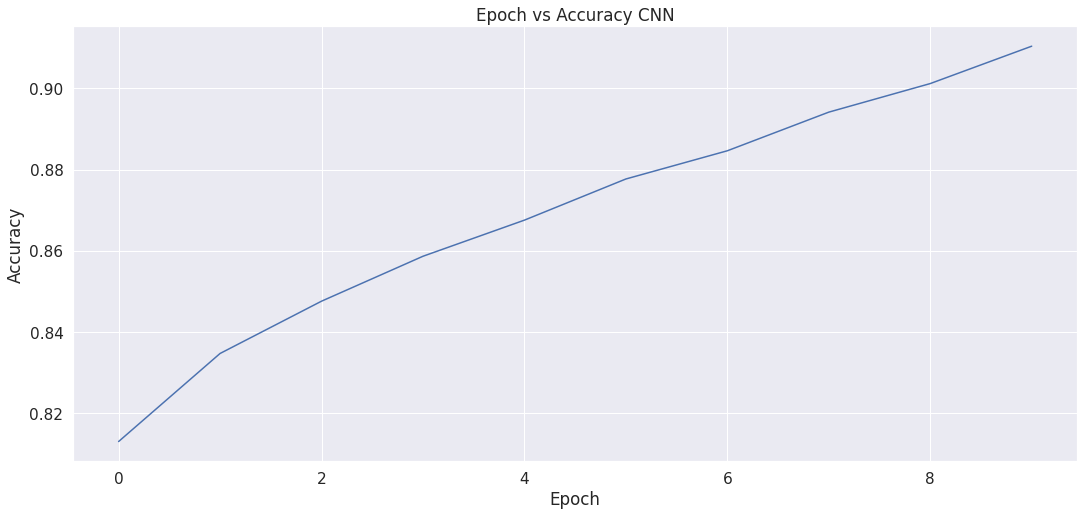

In [ ]:
t0 = time()
#Ejecutar el modelo de red neuronal
history=model.fit(encode_XTrain, categorical_YTrain, epochs=epochs, batch_size=batch_size,shuffle=True,validation_data=(encode_Xvalidation,categorical_YValidation))

print("done CNN in %0.3fs" % (time() - t0))

# plot metrics
plt.figure(figsize=(18, 8))
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy CNN')
plt.savefig(fname=BASE_DIR_GRA +"/Epoch vs Accuracy CNN"+fecha_hora()+".png") 
plt.show() 
    



In [ ]:
scores = model.evaluate(encode_Xvalidation, categorical_YValidation)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


79/79 [==============================] - 0s 4ms/step - loss: 0.2701 - accuracy: 0.9053

accuracy: 90.53%
Baseline Error: 9.47%


In [ ]:
snn_pred = model.predict(encode_Xvalidation, batch_size=batch_size, verbose=1)  
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(categorical_YValidation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

158/158 [==============================] - 0s 2ms/step
(2513,)
(2513,)
0.9052924791086351


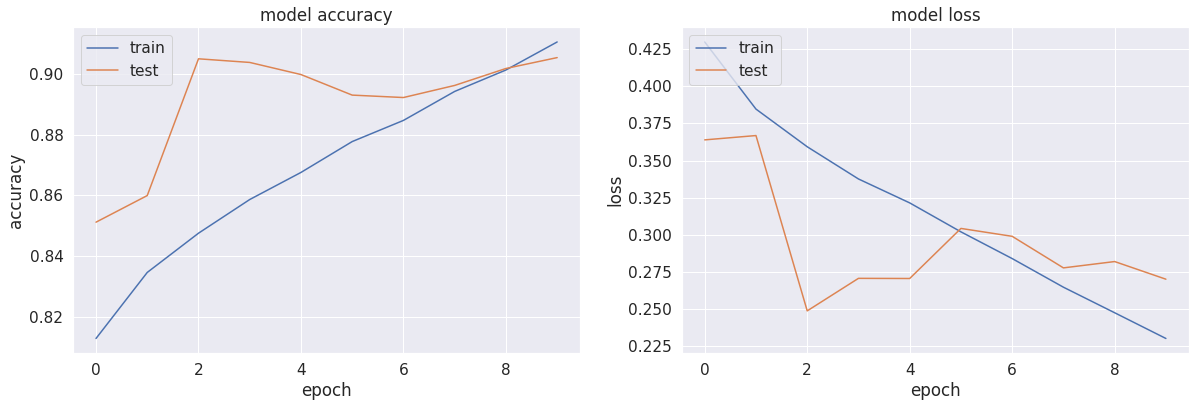

In [ ]:
# Función para imprimir el modelo y la perdida del modelo
def plot_learning_curve(history):
    plt.figure (figsize=(20,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    #plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(fname=BASE_DIR_GRA +"/'model accuracy CNN"+fecha_hora()+".png")

plot_learning_curve(history)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1401
           1       0.91      0.88      0.89      1112

    accuracy                           0.91      2513
   macro avg       0.91      0.90      0.90      2513
weighted avg       0.91      0.91      0.91      2513



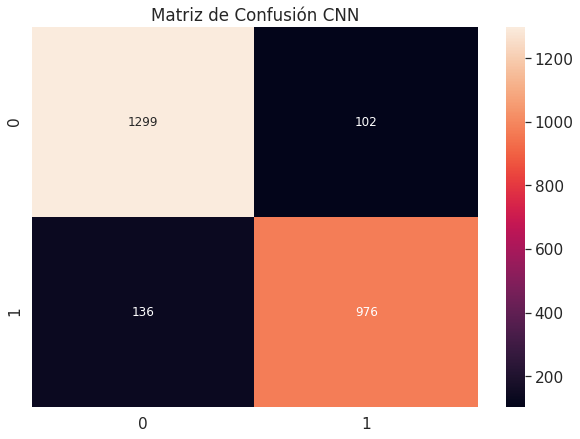

In [ ]:
snn_report = classification_report(np.argmax(categorical_YValidation, axis=1), snn_predicted)  
print(snn_report)

#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(categorical_YValidation, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(num_classes), range(num_classes))  
plt.figure(figsize = (10,7)) 
plt.title('Matriz de Confusión CNN') 
sn.set(font_scale=1.4) #for label size  
sn.heatmap(snn_df_cm, annot=True, fmt = 'd',annot_kws={"size": 12}) # font size
plt.savefig(fname=BASE_DIR_GRA +"/Matriz de Confusión CNN "+fecha_hora()+".png") 
plt.show()

**Recall**  = La capacidad del clasificador para detectar una clase determinada. Es el número de resultados positivos correctos dividido por el número de todas las muestras relevantes (todas las muestras que deberían haber sido identificadas como positivas).

**Precisión** = Dada una predicción de clase de un clasificador, ¿qué probabilidad hay de que sea correcta? Es el número de resultados positivos correctos dividido por el número de resultados positivos predichos por el clasificador.

**F1 Score** = La media armónica del recuerdo y la precisión. Esencialmente, castiga los valores extremos.

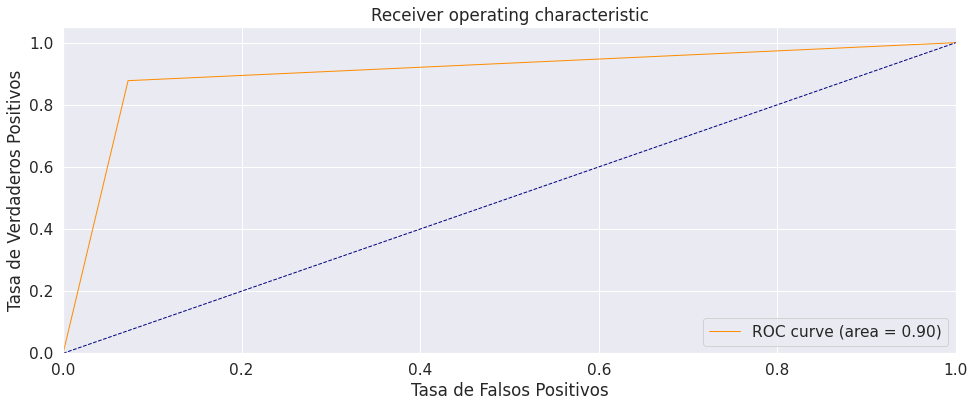

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, snn_predicted)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(16,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_CNN "+fecha_hora()+".png")
plt.show()

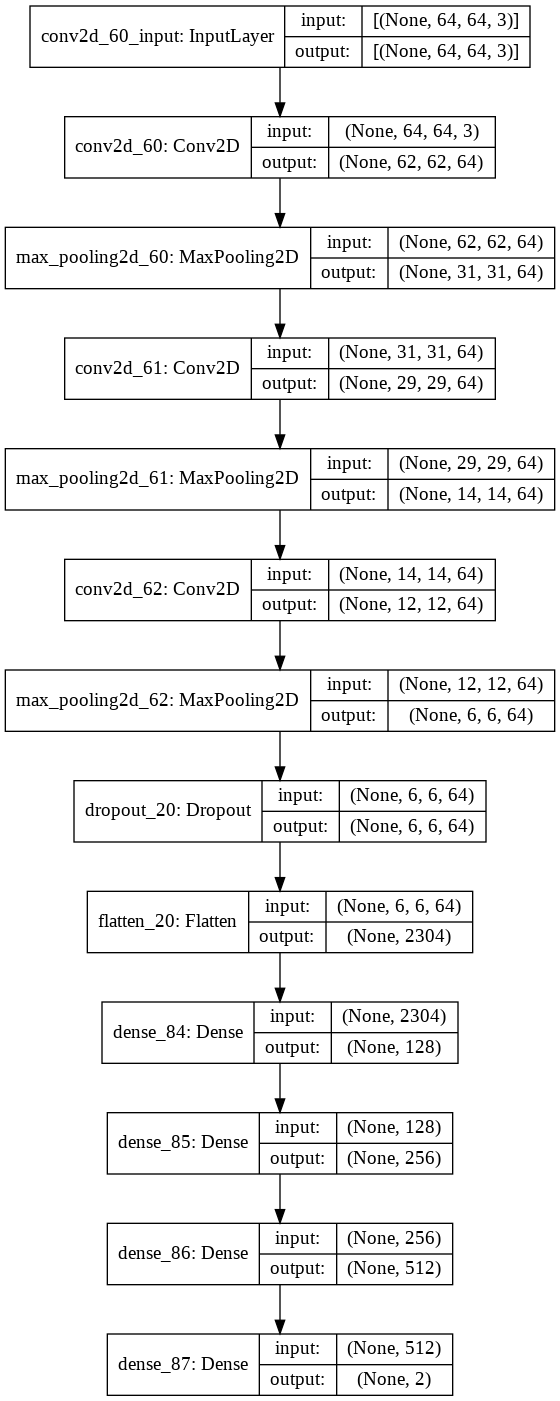

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file=BASE_DIR_GRA +'model_plot '+fecha_hora()+'.png', show_shapes=True, show_layer_names=True)